# **Imports**

In [0]:
#1
#Check CPU and RAM specifications
!cat /proc/cpuinfo
!cat /proc/meminfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management

In [0]:
#2
#Check GPU specifications
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10206111499572708790, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3127188986815100851
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11725598480896674399
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14978973696
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12111665464629010265
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
#3
!pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asgiref                  3.2.7          
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.3.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.1.0          
beautifulsoup4           4.6.3          
bleach                   3.1.4          
blis                     0.4.1          
bokeh                    1.4.0          
boto                     2.49.0         
boto3                    1.12.39        
botocore                 1.15.39        
Bottleneck      

In [0]:
#4
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np 
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
from google.colab import files, auth, drive
import os
import glob
from shutil import copyfile
import cv2 as cv
from google.colab.patches import cv2_imshow
import math
import torch.nn.functional as F

In [0]:
#5
CUDA_LAUNCH_BLOCKING=1

plt.ion()  

use_gpu = torch.cuda.is_available()
if use_gpu:
    print("Using CUDA")
else:
    print("Using CPU")

Using CUDA


In [0]:
#6
# Mount
drive.mount('/content/gdrive', force_remount=True)
data_dir_drive ='/content/gdrive/My Drive/Colab Notebooks/CV/Proj1' #change to the project folder on the drive
data_dir ='/content' # When read from unziped file

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#7
# Unzip dataset to /content
start = time.time()

!unzip -q '/content/gdrive/My Drive/Colab Notebooks/CV/Proj1/data/Project1.zip' -d '/content/gdrive/My Drive/Colab Notebooks/CV/Proj1/data'

print('Took', (time.time() - start), ' secundes to unzip')

mapname:  conversion of  failed
replace /content/gdrive/My Drive/Colab Notebooks/CV/Proj1/data/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Took 39.0506055355072  secundes to unzip


In [0]:
#8
!ls '/content/gdrive/My Drive/Colab Notebooks/CV/Proj1/data'

additional_data		      hw_data.txt    project1.pdf  template.jpg
digits			      images	     Project1.zip
ground-truth-correct-answers  output_format  README.txt


In [0]:
#9
folder_in = data_dir_drive + '/data/images/'
folder_scanned_out = data_dir_drive + '/data/additional_data/1.scanned/'
folder_rotated_and_perspective_out = data_dir_drive + '/data/additional_data/2.rotated+perspective/'
folder_no_annotation_out = data_dir_drive + '/data/additional_data/3.no_annotation/'
folder_handwritten_out = data_dir_drive + '/data/additional_data/4.handwritten/'
folder_digits = data_dir_drive + '/data/digits/'
folder_models = data_dir_drive + '/models/'
folder_barem = data_dir_drive + '/data/ground-truth-correct-answers/'

input_folder = data_dir_drive + '/input_data/'

input_folder_scanned = input_folder + '1.scanned/'
input_folder_rotated_and_perspective = input_folder + '2.rotated+perspective/'
input_folder_no_annotation = input_folder + '3.no_annotation/'
input_folder_handwritten = input_folder + '4.handwritten/'

output_folder = data_dir_drive + '/output_data/'

In [0]:
#10
def make_additional_data_scanned():
    if not os.path.exists(folder_scanned_out):
        os.makedirs(folder_scanned_out)

    for f in glob.iglob(folder_scanned_out+ '/*'):
        os.remove(f)

    for i in range(1, 151):
        file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
        first_line = file.readline()
        file.close() 
        first_line = first_line.replace('\n', '')
        info = first_line.split(' ')
        copyfile(folder_in + 'image_' + str(i) +'.jpg', folder_scanned_out + str(i) + '_scanned_' + info[0] + info[1] +'.jpg')


In [0]:
#11
def make_additional_data_rotated_and_perspective():
    if not os.path.exists(folder_rotated_and_perspective_out):
        os.makedirs(folder_rotated_and_perspective_out)

    for f in glob.iglob(folder_rotated_and_perspective_out + '/*'):
        os.remove(f)

    for i in range(1, 151):
        file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
        first_line = file.readline()
        file.close() 
        first_line = first_line.replace('\n', '')
        info = first_line.split(' ')
        copyfile(folder_in + 'perspective_' + str(i) +'.jpg', folder_rotated_and_perspective_out + str(i) + '_perspective_' + info[0] + info[1] +'.jpg')

    for i in range(1, 151):
        file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
        first_line = file.readline()
        file.close() 
        first_line = first_line.replace('\n', '')
        info = first_line.split(' ')
        copyfile(folder_in + 'rotation_' + str(i) +'.jpg', folder_rotated_and_perspective_out + str(i) + '_rotated_' + info[0] + info[1] +'.jpg')

In [0]:
#12
def make_additional_data_no_annotation():
    if not os.path.exists(folder_no_annotation_out):
        os.makedirs(folder_no_annotation_out)

    for f in glob.iglob(folder_no_annotation_out + '/*'):
        os.remove(f)

    for i in range(1, 151):
        copyfile(folder_in + 'image_' + str(i) +'.jpg', folder_no_annotation_out + str(i) + '_scanned.jpg')
        copyfile(folder_in + 'perspective_' + str(i) +'.jpg', folder_no_annotation_out + str(i) + '_perspective.jpg')
        copyfile(folder_in + 'rotation_' + str(i) +'.jpg', folder_no_annotation_out + str(i) + '_rotated.jpg')

In [0]:
#13
def make_additional_handwritten():
    pass

In [0]:
#14
def make_additional_data():
    make_additional_data_scanned()
    make_additional_data_rotated_and_perspective()
    make_additional_data_no_annotation()
    make_additional_handwritten()

#make_additional_data()

In [0]:
#15
SHOW_INTERMEDIATE_RESULTS = True
char_to_index = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
index_to_char = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [0]:
#16
def print_img(image):
    if SHOW_INTERMEDIATE_RESULTS:
        cv2_imshow(cv.resize(image, (0, 0), fx=0.15, fy=0.15))

In [0]:
#17
ground_truth_hw = np.loadtxt(data_dir_drive + '/data/hw_data.txt', dtype=str)
ground_truth_hw_dict = {}
for [i, nr] in ground_truth_hw:
    ground_truth_hw_dict[int(i)] = nr
print(ground_truth_hw_dict)

{1: '4.9', 2: '6.7', 3: '5.8', 4: '8.5', 5: '4.9', 6: '6.7', 7: '9.1', 8: '3.7', 9: '5.5', 10: '5.5', 11: '4.6', 12: '6.7', 13: '7.3', 14: '6.4', 15: '7.0', 16: '4.6', 17: '7.6', 18: '6.1', 19: '4.9', 20: '7.6', 21: '6.4', 22: '5.5', 23: '6.4', 24: '7.3', 25: '7.9', 26: '8.5', 27: '5.5', 28: '8.8', 29: '6.1', 30: '7.9', 31: '4.9', 32: '5.2', 33: '7.6', 34: '7.0', 35: '7.0', 36: '6.4', 37: '8.8', 38: '6.7', 39: '7.0', 40: '5.8', 41: '7.6', 42: '9.7', 43: '6.7', 44: '6.4', 45: '5.5', 46: '7.3', 47: '8.8', 48: '6.4', 49: '5.8', 50: '7.0', 51: '8.2', 52: '4.9', 53: '4.3', 54: '8.8', 55: '8.2', 56: '5.2', 57: '5.2', 58: '5.5', 59: '7.0', 60: '7.9', 61: '4.9', 62: '4.6', 63: '5.2', 64: '7.6', 65: '7.0', 66: '9.4', 67: '7.3', 68: '4.6', 69: '4.3', 70: '4.0', 71: '6.4', 72: '4.9', 73: '5.5', 74: '9.4', 75: '4.0', 76: '6.1', 77: '7.3', 78: '4.0', 79: '5.5', 80: '5.5', 81: '8.5', 82: '4.9', 83: '6.7', 84: '5.2', 85: '7.6', 86: '4.9', 87: '5.5', 88: '9.1', 89: '6.4', 90: '6.1', 91: '6.1', 92: '5.

# **Scenario 1 (real world)**
You receive a test set containing 55 scanned images annotated with the option (F or I) and with the digit (1, 2, 3 or 4). For each image you have
to output the corresponding grade. 

In [0]:
#1
def find_rows(grayscale_image):
    # find the edges on the Y axis
    # apply Sobel filter on the Y axis
    edges_y = cv.Sobel(grayscale_image, ddepth = cv.CV_64F, dx = 0, dy = 1)
    # normalize the output
    edges_y = np.abs(edges_y)
    edges_y = edges_y / edges_y.max()
            
    # convert to a black and white image
    _, edges_y_th = cv.threshold(edges_y, 0.4, 255, cv.THRESH_BINARY_INV) # the second param is the threshold
    #print_img(edges_y_th)
        
    # create a mask for black pixels
    mask = (edges_y_th == 0) * 1
    # find the rows from mask
    all_lines = np.sum(mask, axis = 1)
    all_lines = all_lines.argsort()

    num_lines = min(len(all_lines), 150)
    edges_y_th = np.dstack((edges_y_th, edges_y_th, edges_y_th))
    lines = [] #  _ x 
    for i in range(num_lines):
        cv.line(edges_y_th, (0, all_lines[-i]), (grayscale_image.shape[1], all_lines[-i]), (0, 0, 255), 2) 
        lines.append([(0, all_lines[-i]), (grayscale_image.shape[1], all_lines[-i])])
        
    #print_img(edges_y_th)
    
    # sort only on y
    lines.sort(key=lambda coords: coords[0][1])
    
    threshold_same_line = 30
    distict_lines = []   
    distict_lines.append(lines[0])
     
    for line in lines:  
        if line[0][1] - distict_lines[-1][0][1] > threshold_same_line:
            distict_lines.append(line)   
    
    # take the last 16 lines
    correct_lines = distict_lines[-16:]
    color_image = np.dstack((grayscale_image, grayscale_image, grayscale_image))
    for line in correct_lines: 
        cv.line(color_image, line[0], line[1], (255, 0, 0), 5) 
        
    #print_img(color_image)
    
    return correct_lines

In [0]:
#2
def find_columns(grayscale_image):
    # find the edges on the X axis
    edges_x = cv.Sobel(grayscale_image, ddepth = cv.CV_64F, dx = 1, dy = 0)
    # normalize the output 
    edges_x = np.abs(edges_x)
    edges_x = edges_x / edges_x.max()
        
    # convert to a black and white image 
    _, edges_x_th = cv.threshold(edges_x, 0.20, 255, cv.THRESH_BINARY_INV) # the second param is the threshold
    #print_img(edges_x_th)
        
    # create a mask for black pixels
    mask = (edges_x_th == 0) * 1
    all_cols = np.sum(mask, axis = 0)
    all_cols = all_cols.argsort()
    num_cols = 60
    edges_x_th = np.dstack((edges_x_th, edges_x_th, edges_x_th))
    cols = [] #  _ x 
    for i in range(num_cols):
        cv.line(edges_x_th, (all_cols[-i], 0), (all_cols[-i], grayscale_image.shape[0]), (0, 0, 255), 2)
        cols.append([(all_cols[-i], 0), (all_cols[-i], grayscale_image.shape[0])])   
        
    #print_img(edges_x_th)
    
    # sort only on x0
    cols.sort(key=lambda coords: coords[0][0])
    threshold_same_column = 30
    distinct_cols = []
    distinct_cols.append(cols[0])
    
    for col in cols:  
        if col[0][0] - distinct_cols[-1][0][0] > threshold_same_column:
            distinct_cols.append(col)
    
    # take the last 5 cols
    correct_cols = distinct_cols[-5:]
    color_image = np.dstack((grayscale_image, grayscale_image, grayscale_image))
    for col in correct_cols: 
        cv.line(color_image, col[0], col[1], (255, 0, 0), 5) 
    #print_img(color_image)
    
    return correct_cols

In [0]:
#3
def find_table(grayscale_image):
    cols = find_columns(grayscale_image.copy())
    rows = find_rows(grayscale_image.copy())
    x_min = cols[0][0][0]
    x_max = cols[-1][1][0]
    y_min = rows[0][0][1]
    y_max = rows[-1][1][1]
    
    table = grayscale_image[y_min:y_max, x_min:x_max] 
    image = np.dstack((grayscale_image, grayscale_image, grayscale_image))
    
    for i in range(min(5, len(cols))): 
        cv.line(image, cols[i][0], cols[i][1], (255, 0, 0), 5) 
    for i in range(min(16, len(rows))):  
        cv.line(image, rows[i][0], rows[i][1], (0, 0, 255), 5) 
    #print_img(image)
    #print_img(table)

    return table, [x_min, y_min, x_max, y_max], cols, rows

In [0]:
#4
# write a function that plots the patches containing X with green
# and patches containing blanks with red
# use here your classifier (test mode)

def find_x(grayscale_image, vertical_lines, horizontal_lines):
    # grayscale_image - input image containing the frame
    # vertical_lines - list with the vertical lines
    # horizontal_lines - list with horizontal lines
    # ground_truth - grounth truth content for a frame    
    mean_x = []
    mean_blank = [] 
    
    image = np.dstack((grayscale_image, grayscale_image, grayscale_image))
    x_color = (0, 255, 0)  # plot a patch containing an X with green color
    blank_color = (0, 0, 255)  # plot a patch containing a blank with red color  

    result = {}  
            
    # crop each patch and display it
    for i in range(len(horizontal_lines) - 1):
        mean_patches = []
        for j in range(len(vertical_lines) - 1):
            x_min = vertical_lines[j][0][0] + 15
            x_max = vertical_lines[j + 1][1][0] - 5
            y_min = horizontal_lines[i][0][1] + 15
            y_max = horizontal_lines[i + 1][1][1] - 5
            
            # write your code here
            patch = grayscale_image[y_min:y_max, x_min:x_max]

            mean_patch = np.round(patch.mean())
            mean_patches.append(mean_patch)

        x_pos_j = np.argmin(mean_patches)
        for j in range(len(vertical_lines) - 1):

            x_min = vertical_lines[j][0][0] + 15
            x_max = vertical_lines[j + 1][1][0] - 5
            y_min = horizontal_lines[i][0][1] + 15
            y_max = horizontal_lines[i + 1][1][1] - 5

            if j == x_pos_j:
                color = x_color
                if i + 1 not in result.keys():
                    result[i + 1] = [index_to_char[j]]
                else:
                    result[i + 1].append(index_to_char[j])
            else:
                color = blank_color
            
            cv.rectangle(image, (x_min, y_min), (x_max, y_max), color=color, thickness=5)
            #cv.putText(image, str(mean_patch)[:3] ,(x_min + 10, y_min + 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2) 

    #print_img(image)
    return result, image

In [0]:
#5
# test 
acc = 0
for i in range(1, 151):
    image_name = 'image_' + str(i) + '.jpg'
   
    print(image_name)
    # load image

    image = cv.imread(folder_in + image_name)
    #print_img(image)

    # blur the image using a 7 by 7 kernel
    image = cv.GaussianBlur(image, (7, 7), 0)

    # take the lower part of the image
    orig_h, orig_w, _ = image.shape
    image = image[int(orig_h * 0.41):int(orig_h * 0.88)]

    # transform the image to grayscale
    grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    left_grayscale_image = grayscale_image[:, :orig_w//2]
    right_grayscale_image = grayscale_image[:, orig_w//2:]

    _, _, cols_l, rows_l = find_table(left_grayscale_image)
    _, _, cols_r, rows_r = find_table(right_grayscale_image)

    # load ground truth
    ground_truth_content = np.loadtxt(folder_in + 'image_' + str(i) + '.txt', dtype=str)
    ground_truth_left = ground_truth_content[1:16]
    ground_truth_right = ground_truth_content[16:-1]

    result_l, image_l = find_x(left_grayscale_image, cols_l, rows_l)
    #print(result_l)
    result_r, image_r = find_x(right_grayscale_image, cols_r, rows_r)
    #print(result_r)

    left_err = 0;
    for r in range(15):
        tr_ans = ground_truth_left[r][1]
        if r + 1 not in result_l.keys():
            print("LINIE NECOMPLETATA")
            left_err += 1
        else:
            if len(result_l[r+1]) > 1:
                print("PREA MULTE RANDURI COMPLETATE")
                left_err += 1
            else:
                if result_l[r+1][0] != tr_ans:
                    left_err = left_err + 1

    if left_err:
        print("GRESEALA PE STANGA")
        print_img(image_l)

    right_err = 0;
    for r in range(15):
        tr_ans = ground_truth_right[r][1]
        if r + 1 not in result_r.keys():
            print("LINIE NECOMPLETATA")
            right_err += 1
        else:
            if len(result_r[r+1]) > 1:
                print("PREA MULTE RANDURI COMPLETATE")
                right_err += 1
            else:
                if result_r[r+1][0] != tr_ans:
                    right_err = right_err + 1

    if right_err:
        print("GRESEALA PE DREAPTA")
        print_img(image_r)

    if left_err == 0 and right_err == 0:
        print("OK")

    acc = acc + right_err + left_err

image_1.jpg
OK
image_2.jpg
OK
image_3.jpg
OK
image_4.jpg
OK
image_5.jpg
OK
image_6.jpg
OK
image_7.jpg
OK
image_8.jpg
OK
image_9.jpg
OK
image_10.jpg
OK
image_11.jpg
OK
image_12.jpg
OK
image_13.jpg
OK
image_14.jpg
OK
image_15.jpg
OK
image_16.jpg
OK
image_17.jpg
OK
image_18.jpg
OK
image_19.jpg
OK
image_20.jpg
OK
image_21.jpg
OK
image_22.jpg
OK
image_23.jpg
OK
image_24.jpg
OK
image_25.jpg
OK
image_26.jpg
OK
image_27.jpg
OK
image_28.jpg
OK
image_29.jpg
OK
image_30.jpg
OK
image_31.jpg
OK
image_32.jpg
OK
image_33.jpg
OK
image_34.jpg
OK
image_35.jpg
OK
image_36.jpg
OK
image_37.jpg
OK
image_38.jpg
OK
image_39.jpg
OK
image_40.jpg
OK
image_41.jpg
OK
image_42.jpg
OK
image_43.jpg
OK
image_44.jpg
OK
image_45.jpg
OK
image_46.jpg
OK
image_47.jpg
OK
image_48.jpg
OK
image_49.jpg
OK
image_50.jpg
OK
image_51.jpg
OK
image_52.jpg
OK
image_53.jpg
OK
image_54.jpg
OK
image_55.jpg
OK
image_56.jpg
OK
image_57.jpg
OK
image_58.jpg
OK
image_59.jpg
OK
image_60.jpg
OK
image_61.jpg
OK
image_62.jpg
OK
image_63.jpg
OK
i

In [0]:
#6
print('Total greseli = ' + str(acc))

Total greseli = 0


In [0]:
#7
def predict_grade_scenario_1(path, subject, number):
    image = cv.imread(path)
    #print_img(image)

    # blur the image using a 7 by 7 kernel
    image = cv.GaussianBlur(image, (7, 7), 0)

    # take the lower part of the image
    orig_h, orig_w, _ = image.shape
    image = image[int(orig_h * 0.41):int(orig_h * 0.88)]

    # transform the image to grayscale
    grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    left_grayscale_image = grayscale_image[:, :orig_w//2]
    right_grayscale_image = grayscale_image[:, orig_w//2:]

    _, _, cols_l, rows_l = find_table(left_grayscale_image)
    _, _, cols_r, rows_r = find_table(right_grayscale_image)

    number_ok = 0
    # load ground truth correct answers / barem
    if subject == 'F':
        if number == 1:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta1.txt', dtype=str)
        elif number == 2:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta2.txt', dtype=str)
        elif number == 3:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta3.txt', dtype=str)
        else:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta4.txt', dtype=str)
    else:
        if number == 1:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta1.txt', dtype=str)
        elif number == 2:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta2.txt', dtype=str)
        elif number == 3:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta3.txt', dtype=str)
        else:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta4.txt', dtype=str)

    ground_truth_left = ground_truth_content[1:16]
    ground_truth_right = ground_truth_content[16:-1]

    result_l, image_l = find_x(left_grayscale_image, cols_l, rows_l)
    #print(result_l)
    result_r, image_r = find_x(right_grayscale_image, cols_r, rows_r)
    #print(result_r)

    left_mis = 0;
    for r in range(15):
        tr_ans = ground_truth_left[r][1]
        if r + 1 not in result_l.keys():
            left_mis += 1
        else:
            if len(result_l[r+1]) > 1:
                left_mis += 1
            else:
                if result_l[r+1][0] != tr_ans:
                    left_mis += 1
                else:
                    number_ok += 1

    right_mis = 0;
    for r in range(15):
        tr_ans = ground_truth_right[r][1]
        if r + 1 not in result_r.keys():
            right_mis += 1
        else:
            if len(result_r[r+1]) > 1:
                right_mis += 1
            else:
                if result_r[r+1][0] != tr_ans:
                    right_mis += 1
                else:
                    number_ok += 1

    return (number_ok * 3) / 10 + 1

In [0]:
#8
acc = 0
for i in range(1, 151):
    image_name = 'image_' + str(i) + '.jpg'
   
    print(image_name)
    file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
    first_line = file.readline()
    file.close() 
    first_line = first_line.replace('\n', '')
    info = first_line.split(' ')

    grade = predict_grade_scenario_1(folder_in + image_name, info[0], int(info[1]))

    if ground_truth_hw_dict[i] == str(grade):
        acc += 1
    else:
        print("GRESEALA")

print("Acc = " + str(acc * 100 / 150) + " %")

image_1.jpg
image_2.jpg
image_3.jpg
image_4.jpg
image_5.jpg
image_6.jpg
image_7.jpg
image_8.jpg
image_9.jpg
image_10.jpg
image_11.jpg
image_12.jpg
image_13.jpg
image_14.jpg
image_15.jpg
image_16.jpg
image_17.jpg
image_18.jpg
image_19.jpg
image_20.jpg
image_21.jpg
image_22.jpg
image_23.jpg
image_24.jpg
image_25.jpg
image_26.jpg
image_27.jpg
image_28.jpg
image_29.jpg
image_30.jpg
image_31.jpg
image_32.jpg
image_33.jpg
image_34.jpg
image_35.jpg
image_36.jpg
image_37.jpg
image_38.jpg
image_39.jpg
image_40.jpg
image_41.jpg
image_42.jpg
image_43.jpg
image_44.jpg
image_45.jpg
image_46.jpg
image_47.jpg
image_48.jpg
image_49.jpg
image_50.jpg
image_51.jpg
image_52.jpg
image_53.jpg
image_54.jpg
image_55.jpg
image_56.jpg
image_57.jpg
image_58.jpg
image_59.jpg
image_60.jpg
image_61.jpg
image_62.jpg
image_63.jpg
image_64.jpg
image_65.jpg
image_66.jpg
image_67.jpg
image_68.jpg
image_69.jpg
image_70.jpg
image_71.jpg
image_72.jpg
image_73.jpg
image_74.jpg
image_75.jpg
image_76.jpg
image_77.jpg
image_78

# **Scenario 2 (intermediate)**
You receive a test set containing 50 rotated and 50 perspective images annotated with the view (rotated or perspective), the option (F or I) and the digit (1, 2, 3 or 4). For each image you have to output the corresponding grade

In [0]:
#1
def transform_rotaded_and_perspective_in_scanned(img_path, template_path = data_dir_drive + '/data/template.jpg'):
    img_template = cv.imread(template_path)

    (h, w) = img_template.shape[:2]
    width = 3500
    r = width / float(w)
    dim = (width, int(h * r))
    img_template = cv.resize(img_template, dim, interpolation = cv.INTER_AREA)

    img_query = cv.imread(img_path)
    img_template = cv.cvtColor(img_template, cv.COLOR_BGR2RGB)
    img_query = cv.cvtColor(img_query, cv.COLOR_BGR2RGB)

    # create ORB object
    orb = cv.ORB_create(nfeatures=15000)
    # get the keypoints and the corresponding descriptors
    kp_template, des_template = orb.detectAndCompute(img_template, None)

    kp_query, des_query = orb.detectAndCompute(img_query, None) 

    # drawing keypoints
    drawing_img1 = np.copy(img_template)
    cv.drawKeypoints(img_template, kp_template, drawing_img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # drawing keypoints
    drawing_img2 = np.copy(img_query)
    cv.drawKeypoints(img_query, kp_query, drawing_img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    #plt.figure(figsize=(14, 14))
    #plt.subplot(1, 2, 1)
    #plt.imshow(drawing_img1)
    #plt.subplot(1, 2, 2)
    #plt.imshow(drawing_img2)
    #plt.show()

    # help here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
    # https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html

    # create BFMatcher object
    # matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des_query, des_template) # query_image, train_image
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # Draw first 50 matches.
    #plt.figure(figsize=(14, 14))
    #img3 = cv.drawMatches(img_template, kp_template, img_query, kp_query, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #plt.imshow(img3)
    #plt.show()

    matches = matches[:int(0.5 * len(matches))]
    points_template = np.zeros((len(matches), 2))
    points_query = np.zeros((len(matches), 2))

    for i, match in enumerate(matches):
        points_template[i, :] = kp_template[match.trainIdx].pt
        points_query[i, :] = kp_query[match.queryIdx].pt

    M, _ = cv.findHomography(points_query, points_template, cv.RANSAC, ransacReprojThreshold = 8)

    # use homography to get the aligned image 
    height, width, _ = img_template.shape # the shape with respect to the template image
    aligned_image2 = cv.warpPerspective(img_query, M, (width, height), flags=cv.INTER_NEAREST)

    return aligned_image2

In [0]:
#2
def set_global_cols_and_rows_for_scenario_2():
    img_template = cv.imread(data_dir_drive + '/data/template.jpg')
    (h, w) = img_template.shape[:2]
    width = 3500
    r = width / float(w)
    dim = (width, int(h * r))
    img_template = cv.resize(img_template, dim, interpolation = cv.INTER_AREA)
    orig_h, orig_w, _ = img_template.shape
    img_template = img_template[int(orig_h * 0.17):int(orig_h * 0.83)]
    img_template = img_template[:, int(orig_w * 0.05):int(orig_w * 0.95)]

    #print_img(image)
    img_template = cv.GaussianBlur(img_template,(7,7),0)
    img_template = cv.cvtColor(img_template, cv.COLOR_BGR2GRAY)

    left_img_template = img_template[:, :orig_w//2]
    right_img_template = img_template[:, orig_w//2:]

    _, _, cols_l, rows_l = find_table(left_img_template)
    _, _, cols_r, rows_r = find_table(right_img_template)
    return cols_l, rows_l, cols_r, rows_r

cols_l, rows_l, cols_r, rows_r = set_global_cols_and_rows_for_scenario_2()

In [0]:
#3
# test
acc_perspective = 0

for i in range(1, 151):
    image_name = 'perspective_' + str(i) + '.jpg'
   
    print(image_name)
    # load image

    try:
        aligned_image2 = transform_rotaded_and_perspective_in_scanned(folder_in + image_name)
        #print_img(aligned_image2)

        # take the lower part of the image
        orig_h, orig_w, _ = aligned_image2.shape
        aligned_image2 = aligned_image2[int(orig_h * 0.17):int(orig_h * 0.83)]
        image = aligned_image2[:, int(orig_w * 0.05):int(orig_w * 0.95)]

        #print_img(image)
        img_blur = cv.GaussianBlur(image,(7,7),0)
        grayscale_image = cv.cvtColor(img_blur, cv.COLOR_BGR2GRAY)
        th = cv.adaptiveThreshold(grayscale_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

        left_grayscale_image = th[:, :orig_w//2]
        right_grayscale_image = th[:, orig_w//2:]

        # load ground truth
        ground_truth_content = np.loadtxt(folder_in + 'image_' + str(i) + '.txt', dtype=str)
        ground_truth_left = ground_truth_content[1:16]
        ground_truth_right = ground_truth_content[16:-1]

        result_l, image_l = find_x(left_grayscale_image, cols_l, rows_l)
        #print(result_l)
        result_r, image_r = find_x(right_grayscale_image, cols_r, rows_r)
        #print(result_r)

        left_err = 0;
        for r in range(15):
            tr_ans = ground_truth_left[r][1]
            if r + 1 not in result_l.keys():
                print("LINIE NECOMPLETATA")
                left_err += 1
            else:
                if len(result_l[r+1]) > 1:
                    print("PREA MULTE RANDURI COMPLETATE")
                    left_err += 1
                else:
                    if result_l[r+1][0] != tr_ans:
                        left_err = left_err + 1

        if left_err:
            print("GRESEALA PE STANGA")
            print_img(image_l)

        right_err = 0;
        for r in range(15):
            tr_ans = ground_truth_right[r][1]
            if r + 1 not in result_r.keys():
                print("LINIE NECOMPLETATA")
                right_err += 1
            else:
                if len(result_r[r+1]) > 1:
                    print("PREA MULTE RANDURI COMPLETATE")
                    right_err += 1
                else:
                    if result_r[r+1][0] != tr_ans:
                        right_err = right_err + 1

        if right_err:
            print("GRESEALA PE DREAPTA")
            print_img(image_r)

        if left_err == 0 and right_err == 0:
            print("OK")
            acc_perspective = acc_perspective + 1
        else:
            print_img(th)

    except Exception as e:
        print(e)
 
print('ACC = ' + str(acc_perspective))

perspective_1.jpg
OK
perspective_2.jpg
OK
perspective_3.jpg
OK
perspective_4.jpg
OK
perspective_5.jpg
OK
perspective_6.jpg
OK
perspective_7.jpg
OK
perspective_8.jpg
OK
perspective_9.jpg
OK
perspective_10.jpg
OK
perspective_11.jpg
OK
perspective_12.jpg
OK
perspective_13.jpg
OK
perspective_14.jpg
OK
perspective_15.jpg
OK
perspective_16.jpg
OK
perspective_17.jpg
OK
perspective_18.jpg
OK
perspective_19.jpg
OK
perspective_20.jpg
OK
perspective_21.jpg
OK
perspective_22.jpg
OK
perspective_23.jpg
OK
perspective_24.jpg
OK
perspective_25.jpg
OK
perspective_26.jpg
OK
perspective_27.jpg
OK
perspective_28.jpg
OK
perspective_29.jpg
OK
perspective_30.jpg
OK
perspective_31.jpg
OK
perspective_32.jpg
OK
perspective_33.jpg
OK
perspective_34.jpg
OK
perspective_35.jpg
OK
perspective_36.jpg
OK
perspective_37.jpg
OK
perspective_38.jpg
OK
perspective_39.jpg
OK
perspective_40.jpg
OK
perspective_41.jpg
OK
perspective_42.jpg
OK
perspective_43.jpg
OK
perspective_44.jpg
OK
perspective_45.jpg
OK
perspective_46.jpg


In [0]:
#4
# test  classifier 
acc_rotation = 0

for i in range(1, 151):
    image_name = 'rotation_' + str(i) + '.jpg'
   
    print(image_name)
    # load image

    try:
        aligned_image2 = transform_rotaded_and_perspective_in_scanned(folder_in + image_name)
        #print_img(aligned_image2)

        # take the lower part of the image
        orig_h, orig_w, _ = aligned_image2.shape
        aligned_image2 = aligned_image2[int(orig_h * 0.17):int(orig_h * 0.83)]
        image = aligned_image2[:, int(orig_w * 0.05):int(orig_w * 0.95)]

        #print_img(image)
        img_blur = cv.GaussianBlur(image,(7,7),0)
        grayscale_image = cv.cvtColor(img_blur, cv.COLOR_BGR2GRAY)
        th = cv.adaptiveThreshold(grayscale_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

        left_grayscale_image = th[:, :orig_w//2]
        right_grayscale_image = th[:, orig_w//2:]

        # load ground truth
        ground_truth_content = np.loadtxt(folder_in + 'image_' + str(i) + '.txt', dtype=str)
        ground_truth_left = ground_truth_content[1:16]
        ground_truth_right = ground_truth_content[16:-1]

        result_l, image_l = find_x(left_grayscale_image, cols_l, rows_l)
        #print(result_l)
        result_r, image_r = find_x(right_grayscale_image, cols_r, rows_r)
        #print(result_r)

        left_err = 0;
        for r in range(15):
            tr_ans = ground_truth_left[r][1]
            if r + 1 not in result_l.keys():
                print("LINIE NECOMPLETATA")
                left_err += 1
            else:
                if len(result_l[r+1]) > 1:
                    print("PREA MULTE RANDURI COMPLETATE")
                    left_err += 1
                else:
                    if result_l[r+1][0] != tr_ans:
                        left_err = left_err + 1

        if left_err:
            print("GRESEALA PE STANGA")
            print_img(image_l)

        right_err = 0;
        for r in range(15):
            tr_ans = ground_truth_right[r][1]
            if r + 1 not in result_r.keys():
                print("LINIE NECOMPLETATA")
                right_err += 1
            else:
                if len(result_r[r+1]) > 1:
                    print("PREA MULTE RANDURI COMPLETATE")
                    right_err += 1
                else:
                    if result_r[r+1][0] != tr_ans:
                        right_err = right_err + 1

        if right_err:
            print("GRESEALA PE DREAPTA")
            print_img(image_r)

        if left_err == 0 and right_err == 0:
            print("OK")
            acc_rotation += 1
        else:
            print_img(th)
    except Exception as e:
        print(e)
 
print('ACC = ' + str(acc_rotation))

rotation_1.jpg
OK
rotation_2.jpg
OK
rotation_3.jpg
OK
rotation_4.jpg
OK
rotation_5.jpg
OK
rotation_6.jpg
OK
rotation_7.jpg
OK
rotation_8.jpg
OK
rotation_9.jpg
OK
rotation_10.jpg
OK
rotation_11.jpg
OK
rotation_12.jpg
OK
rotation_13.jpg
OK
rotation_14.jpg
OK
rotation_15.jpg
OK
rotation_16.jpg
OK
rotation_17.jpg
OK
rotation_18.jpg
OK
rotation_19.jpg
OK
rotation_20.jpg
OK
rotation_21.jpg
OK
rotation_22.jpg
OK
rotation_23.jpg
OK
rotation_24.jpg
OK
rotation_25.jpg
OK
rotation_26.jpg
OK
rotation_27.jpg
OK
rotation_28.jpg
OK
rotation_29.jpg
OK
rotation_30.jpg
OK
rotation_31.jpg
OK
rotation_32.jpg
OK
rotation_33.jpg
OK
rotation_34.jpg
OK
rotation_35.jpg
OK
rotation_36.jpg
OK
rotation_37.jpg
OK
rotation_38.jpg
OK
rotation_39.jpg
OK
rotation_40.jpg
OK
rotation_41.jpg
OK
rotation_42.jpg
OK
rotation_43.jpg
OK
rotation_44.jpg
OK
rotation_45.jpg
OK
rotation_46.jpg
OK
rotation_47.jpg
OK
rotation_48.jpg
OK
rotation_49.jpg
OK
rotation_50.jpg
OK
rotation_51.jpg
OK
rotation_52.jpg
OK
rotation_53.jpg
OK
ro

In [0]:
#5
def predict_grade_scenario_2(path, subject, number):
    cols_l, rows_l, cols_r, rows_r = set_global_cols_and_rows_for_scenario_2()

    aligned_image2 = transform_rotaded_and_perspective_in_scanned(path)
    #print_img(aligned_image2)

    # take the lower part of the image
    orig_h, orig_w, _ = aligned_image2.shape
    aligned_image2 = aligned_image2[int(orig_h * 0.17):int(orig_h * 0.83)]
    image = aligned_image2[:, int(orig_w * 0.05):int(orig_w * 0.95)]

    #print_img(image)
    img_blur = cv.GaussianBlur(image,(7,7),0)
    grayscale_image = cv.cvtColor(img_blur, cv.COLOR_BGR2GRAY)
    th = cv.adaptiveThreshold(grayscale_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

    left_grayscale_image = th[:, :orig_w//2]
    right_grayscale_image = th[:, orig_w//2:]

    number_ok = 0
    # load ground truth correct answers / barem
    if subject == 'F':
        if number == 1:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta1.txt', dtype=str)
        elif number == 2:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta2.txt', dtype=str)
        elif number == 3:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta3.txt', dtype=str)
        else:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta4.txt', dtype=str)
    else:
        if number == 1:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta1.txt', dtype=str)
        elif number == 2:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta2.txt', dtype=str)
        elif number == 3:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta3.txt', dtype=str)
        else:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta4.txt', dtype=str)

    ground_truth_left = ground_truth_content[1:16]
    ground_truth_right = ground_truth_content[16:-1]

    result_l, image_l = find_x(left_grayscale_image, cols_l, rows_l)
    #print(result_l)
    result_r, image_r = find_x(right_grayscale_image, cols_r, rows_r)
    #print(result_r)

    left_mis = 0;
    for r in range(15):
        tr_ans = ground_truth_left[r][1]
        if r + 1 not in result_l.keys():
            left_mis += 1
        else:
            if len(result_l[r+1]) > 1:
                left_mis += 1
            else:
                if result_l[r+1][0] != tr_ans:
                    left_mis += 1
                else:
                    number_ok += 1

    right_mis = 0;
    for r in range(15):
        tr_ans = ground_truth_right[r][1]
        if r + 1 not in result_r.keys():
            right_mis += 1
        else:
            if len(result_r[r+1]) > 1:
                right_mis += 1
            else:
                if result_r[r+1][0] != tr_ans:
                    right_mis += 1
                else:
                    number_ok += 1

    return (number_ok * 3) / 10 + 1

In [0]:
#6
acc = 0
for i in range(1, 151):
    image_name = 'perspective_' + str(i) + '.jpg'
   
    print(image_name)
    file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
    first_line = file.readline()
    file.close() 
    first_line = first_line.replace('\n', '')
    info = first_line.split(' ')

    grade = predict_grade_scenario_2(folder_in + image_name, info[0], int(info[1]))

    if ground_truth_hw_dict[i] == str(grade):
        acc += 1
    else:
        print("GRESEALA")

print("Acc = " + str(acc * 100 / 150) + " %")

perspective_1.jpg
perspective_2.jpg
perspective_3.jpg
perspective_4.jpg
perspective_5.jpg
perspective_6.jpg
perspective_7.jpg
perspective_8.jpg
perspective_9.jpg
perspective_10.jpg
perspective_11.jpg
perspective_12.jpg
perspective_13.jpg
perspective_14.jpg
perspective_15.jpg
perspective_16.jpg
perspective_17.jpg
perspective_18.jpg
perspective_19.jpg
perspective_20.jpg
perspective_21.jpg
perspective_22.jpg
perspective_23.jpg
perspective_24.jpg
perspective_25.jpg
perspective_26.jpg
perspective_27.jpg
perspective_28.jpg
perspective_29.jpg
perspective_30.jpg
perspective_31.jpg
perspective_32.jpg
perspective_33.jpg
perspective_34.jpg
perspective_35.jpg
perspective_36.jpg
perspective_37.jpg
perspective_38.jpg
perspective_39.jpg
perspective_40.jpg
perspective_41.jpg
perspective_42.jpg
perspective_43.jpg
perspective_44.jpg
perspective_45.jpg
perspective_46.jpg
perspective_47.jpg
perspective_48.jpg
perspective_49.jpg
perspective_50.jpg
perspective_51.jpg
perspective_52.jpg
perspective_53.jpg
pe

In [0]:
#7
acc = 0
for i in range(1, 151):
    image_name = 'rotation_' + str(i) + '.jpg'
   
    print(image_name)
    file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
    first_line = file.readline()
    file.close() 
    first_line = first_line.replace('\n', '')
    info = first_line.split(' ')

    grade = predict_grade_scenario_2(folder_in + image_name, info[0], int(info[1]))

    if ground_truth_hw_dict[i] == str(grade):
        acc += 1
    else:
        print("GRESEALA")

print("Acc = " + str(acc * 100 / 150) + " %")

rotation_1.jpg
rotation_2.jpg
rotation_3.jpg
rotation_4.jpg
rotation_5.jpg
rotation_6.jpg
rotation_7.jpg
rotation_8.jpg
rotation_9.jpg
rotation_10.jpg
rotation_11.jpg
rotation_12.jpg
rotation_13.jpg
rotation_14.jpg
rotation_15.jpg
rotation_16.jpg
rotation_17.jpg
rotation_18.jpg
rotation_19.jpg
rotation_20.jpg
rotation_21.jpg
rotation_22.jpg
rotation_23.jpg
rotation_24.jpg
rotation_25.jpg
rotation_26.jpg
rotation_27.jpg
rotation_28.jpg
rotation_29.jpg
rotation_30.jpg
rotation_31.jpg
rotation_32.jpg
rotation_33.jpg
rotation_34.jpg
rotation_35.jpg
rotation_36.jpg
rotation_37.jpg
rotation_38.jpg
rotation_39.jpg
rotation_40.jpg
rotation_41.jpg
rotation_42.jpg
rotation_43.jpg
rotation_44.jpg
rotation_45.jpg
rotation_46.jpg
rotation_47.jpg
rotation_48.jpg
rotation_49.jpg
rotation_50.jpg
rotation_51.jpg
rotation_52.jpg
rotation_53.jpg
rotation_54.jpg
rotation_55.jpg
rotation_56.jpg
rotation_57.jpg
rotation_58.jpg
rotation_59.jpg
rotation_60.jpg
rotation_61.jpg
rotation_62.jpg
rotation_63.jpg
r

In [0]:
#8
acc = 0
for i in range(1, 151):
    image_name = 'image_' + str(i) + '.jpg'
   
    print(image_name)
    file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
    first_line = file.readline()
    file.close() 
    first_line = first_line.replace('\n', '')
    info = first_line.split(' ')

    grade = predict_grade_scenario_2(folder_in + image_name, info[0], int(info[1]))

    if ground_truth_hw_dict[i] == str(grade):
        acc += 1
    else:
        print("GRESEALA")

print("Acc = " + str(acc * 100 / 150) + " %")

image_1.jpg
image_2.jpg
image_3.jpg
image_4.jpg
image_5.jpg
image_6.jpg
image_7.jpg
image_8.jpg
image_9.jpg
image_10.jpg
image_11.jpg
image_12.jpg
image_13.jpg
image_14.jpg
image_15.jpg
image_16.jpg
image_17.jpg
image_18.jpg
image_19.jpg
image_20.jpg
image_21.jpg
image_22.jpg
image_23.jpg
image_24.jpg
image_25.jpg
image_26.jpg
image_27.jpg
image_28.jpg
image_29.jpg
image_30.jpg
image_31.jpg
image_32.jpg
image_33.jpg
image_34.jpg
image_35.jpg
image_36.jpg
image_37.jpg
image_38.jpg
image_39.jpg
image_40.jpg
image_41.jpg
image_42.jpg
image_43.jpg
image_44.jpg
image_45.jpg
image_46.jpg
image_47.jpg
image_48.jpg
image_49.jpg
image_50.jpg
image_51.jpg
image_52.jpg
image_53.jpg
image_54.jpg
image_55.jpg
image_56.jpg
image_57.jpg
image_58.jpg
image_59.jpg
image_60.jpg
image_61.jpg
image_62.jpg
image_63.jpg
image_64.jpg
image_65.jpg
image_66.jpg
image_67.jpg
image_68.jpg
image_69.jpg
image_70.jpg
image_71.jpg
image_72.jpg
image_73.jpg
image_74.jpg
image_75.jpg
image_76.jpg
image_77.jpg
image_78

# **Scenario 3 (no annotations)**
You receive a test set containing 75 images (scanned, rotated or perspective view). There is no annotation available. For each image you have to output the corresponding grade

In [0]:
#1
def detect_subject_choice(choice_patch_grayscale, rows, cols):

    # apply findCountour function in order to extract all the countour in the image
    # take only the black (ish) pixels
    mask = np.uint8(choice_patch_grayscale < 50)
    contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    areas = []
    coords = []
    if len(contours) != 0:
        for idx_det in range(len(contours)):
            contour = contours[idx_det] 
            contour = np.squeeze(contour)  
            
            if contour.ndim == 1:
                continue
                
            x_min = np.min(contour[:, 0])
            x_max = np.max(contour[:, 0])

            y_min = np.min(contour[:, 1])
            y_max = np.max(contour[:, 1])
            areas.append(((x_max - x_min) * (y_max - y_min)))
            coords.append([(x_min, y_min), (x_max, y_max)])
    if len(areas) < 2:
        return None
    
    areas = np.array(areas)
    indices = areas.argsort()
    bbox_1 = coords[indices[-1]]
    bbox_2 = coords[indices[-2]]

    choice_patch_color = np.dstack((choice_patch_grayscale, choice_patch_grayscale, choice_patch_grayscale))
    cv.rectangle(choice_patch_color, bbox_1[0], bbox_1[1], color=(255, 0, 255), thickness=5)
    cv.rectangle(choice_patch_color, bbox_2[0], bbox_2[1], color=(0, 255, 255), thickness=5)
    #cv2_imshow(choice_patch_color)

    return bbox_1, bbox_2

In [0]:
#2
def make_data_set():

    if not os.path.exists(folder_digits + '1'):
        os.makedirs(folder_digits + '1')
    if not os.path.exists(folder_digits + '2'):
        os.makedirs(folder_digits + '2')
    if not os.path.exists(folder_digits + '3'):
        os.makedirs(folder_digits + '3')
    if not os.path.exists(folder_digits + '4'):
        os.makedirs(folder_digits + '4')

    for f in glob.iglob(folder_digits + '1/*'):
        os.remove(f)
    for f in glob.iglob(folder_digits + '2/*'):
        os.remove(f)
    for f in glob.iglob(folder_digits + '3/*'):
        os.remove(f)
    for f in glob.iglob(folder_digits + '4/*'):
        os.remove(f)

    for i in range(1, 151): 
        file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
        first_line = file.readline()
        file.close() 
        first_line = first_line.replace('\n', '')
        info = first_line.split(' ')

        image_name = 'image_' + str(i) + '.jpg'
    
        print(image_name)
        # load image
        image = cv.imread(folder_in + image_name)

        try:
            #aligned_image2 = transform_rotaded_and_perspective_in_scanned(folder_in + image_name)
            #print_img(aligned_image2)

            # take the lower part of the image
            #orig_h, orig_w, _ = aligned_image2.shape
            #image = aligned_image2[int(orig_h * 0):int(orig_h * 0.85)]

            orig_h, orig_w, _ = image.shape
            image = image[int(orig_h * 0.41):int(orig_h * 0.88)]

            img_blur = cv.GaussianBlur(image,(7,7),0)
            grayscale_image = cv.cvtColor(img_blur, cv.COLOR_BGR2GRAY)
            th = cv.adaptiveThreshold(grayscale_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

            left_grayscale_image = th[:, :orig_w//2]
            right_grayscale_image = th[:, orig_w//2:]

            _, bbox_l, cols_l, rows_l = find_table(left_grayscale_image)
            _, bbox_r, cols_r, rows_r = find_table(right_grayscale_image)

            x_min = cols_r[-2][0][0]
            x_max = cols_r[-1][0][0]
            y_min = 0 
            y_max = rows_r[0][1][1] - 2*(rows_r[1][1][1]-rows_r[0][1][1])

            patch = grayscale_image[:, orig_w//2:]
            patch = patch[y_min:y_max, x_min:x_max]

            bbox_1, bbox_2 = detect_subject_choice(patch, rows_r, cols_r)

            (x_min_1, y_min_1), (x_max_1, y_max_1) = bbox_1
            (x_min_2, y_min_2), (x_max_2, y_max_2) = bbox_2
            
            patch1 = patch[y_min_1 + 10:y_max_1 - 10, x_min_1 + 10:x_max_1 - 10]
            patch2 = patch[y_min_2 + 10:y_max_2 - 10, x_min_2 + 10:x_max_2 - 10]

            mean_patch_box_1 = np.round(patch1.mean())
            mean_patch_box_2 = np.round(patch2.mean())

            choice_patch_color = np.dstack((patch, patch, patch))
            if mean_patch_box_1 < mean_patch_box_2:
                cv.imwrite(folder_digits + info[1] + '/' + str(i) + '.jpg', patch1)
                cv.rectangle(choice_patch_color, (x_min_1 + 10, y_min_1 + 10), (x_max_1 - 10, y_max_1 - 10), color=(255, 0, 255), thickness=5)
            else:
                cv.imwrite(folder_digits + info[1] + '/' + str(i) + '.jpg', patch2)
                cv.rectangle(choice_patch_color, (x_min_2 + 10, y_min_2 + 10), (x_max_2 - 10, y_max_2 - 10), color=(0, 255, 255), thickness=5)
            #cv2_imshow(choice_patch_color)
            #print(info[0])
        except Exception as e:
            print(e)
            continue

In [0]:
#3
make_data_set()

image_1.jpg
image_2.jpg
image_3.jpg
image_4.jpg
image_5.jpg
image_6.jpg
image_7.jpg
image_8.jpg
image_9.jpg
image_10.jpg
image_11.jpg
image_12.jpg
image_13.jpg
image_14.jpg
image_15.jpg
image_16.jpg
image_17.jpg
image_18.jpg
image_19.jpg
image_20.jpg
image_21.jpg
image_22.jpg
image_23.jpg
image_24.jpg
image_25.jpg
image_26.jpg
image_27.jpg
image_28.jpg
image_29.jpg
image_30.jpg
image_31.jpg
image_32.jpg
image_33.jpg
image_34.jpg
image_35.jpg
image_36.jpg
image_37.jpg
image_38.jpg
image_39.jpg
image_40.jpg
image_41.jpg
image_42.jpg
image_43.jpg
image_44.jpg
image_45.jpg
image_46.jpg
image_47.jpg
image_48.jpg
image_49.jpg
image_50.jpg
image_51.jpg
image_52.jpg
image_53.jpg
image_54.jpg
image_55.jpg
image_56.jpg
image_57.jpg
image_58.jpg
image_59.jpg
image_60.jpg
image_61.jpg
image_62.jpg
image_63.jpg
image_64.jpg
image_65.jpg
image_66.jpg
image_67.jpg
image_68.jpg
image_69.jpg
image_70.jpg
image_71.jpg
image_72.jpg
image_73.jpg
image_74.jpg
image_75.jpg
image_76.jpg
image_77.jpg
image_78

In [0]:
#4
# Training settings    
kwargs={}
class Args():
  def __init__(self):
      self.batch_size = 64
      self.test_batch_size = 64
      self.epochs = 10
      self.lr = 0.01
      self.momentum = 0.9
      self.seed = 1
      self.log_interval = int(10000 / self.batch_size)
      self.cuda = False

args = Args()

use_cuda = torch.cuda.is_available()
torch.manual_seed(args.seed)
device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

In [0]:
#5
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       
                   ])),
    batch_size=args.batch_size, shuffle=True,drop_last=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                   ])),
    batch_size=args.test_batch_size, shuffle=True,drop_last=True, **kwargs)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [0]:
#6
no_filters1 = 20
no_filter2 = 50
no_neurons1 = 500
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, no_filters1, 5, 1)
        self.conv2 = nn.Conv2d(no_filters1, no_filter2, 5, 1)
        self.fc1 = nn.Linear(4*4*no_filter2, no_neurons1)
        self.fc2 = nn.Linear(no_neurons1, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*no_filter2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [0]:
#7
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [0]:
#8
model = CNN().to(device)

optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    train(args, model, device, train_loader, optimizer, epoch)
    test(args, model, device, test_loader)

torch.save(model.state_dict(), folder_models + "mnist_cnn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301512
Train Epoch: 1 [9984/60000 (17%)]	Loss: 0.424392
Train Epoch: 1 [19968/60000 (33%)]	Loss: 0.215760
Train Epoch: 1 [29952/60000 (50%)]	Loss: 0.132523
Train Epoch: 1 [39936/60000 (67%)]	Loss: 0.005768
Train Epoch: 1 [49920/60000 (83%)]	Loss: 0.045205
Train Epoch: 1 [59904/60000 (100%)]	Loss: 0.064776

Test set: Average loss: 0.0663, Accuracy: 9767/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.068517
Train Epoch: 2 [9984/60000 (17%)]	Loss: 0.011490
Train Epoch: 2 [19968/60000 (33%)]	Loss: 0.017338
Train Epoch: 2 [29952/60000 (50%)]	Loss: 0.203606
Train Epoch: 2 [39936/60000 (67%)]	Loss: 0.013635
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.036105
Train Epoch: 2 [59904/60000 (100%)]	Loss: 0.046529

Test set: Average loss: 0.0454, Accuracy: 9840/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.014061
Train Epoch: 3 [9984/60000 (17%)]	Loss: 0.029951
Train Epoch: 3 [19968/60000 (33%)]	Loss: 0.027346
Train Epoch: 3 [29952/60000 (50%)]	Loss: 0.0

In [0]:
#9
model = CNN().to(device)
model.load_state_dict(torch.load(folder_models + "mnist_cnn.pt", map_location=torch.device(device)))

<All keys matched successfully>

In [0]:
#10
total = 0
acc = 0
with torch.no_grad():
    for img_name in glob.iglob(folder_digits + '1/*'):
        total += 1
        #print(img_name)

        img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
        #img = img[5:-5, 5:-5]
        img = cv.GaussianBlur(img, (7, 7), 0)
        th = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,2)
        th = cv.bitwise_not(th)
        th = th [5:-5, 5:-5]
        th = cv.copyMakeBorder(th, 10, 10, 10, 10, cv.BORDER_CONSTANT, None, 0)
        #cv2_imshow(th)
        resized = cv.resize(th, (28, 28), interpolation = cv.INTER_AREA)
        resized = np.array(resized, dtype = float)
        data = torch.from_numpy(np.expand_dims(np.expand_dims(resized, 0), 0))
        data = data.type(torch.FloatTensor)

        data = data.to(device)
        output = model(data)
        output = output[0].cpu().numpy()
        output = output[1:5]
        #print(output)

        pred = output.argmax() + 1 # get the index of the max log-probability
        #print(pred)
        if pred == 1:
            acc += 1
        elif pred == 4 and output[3] - output[0] < 2000:
            acc += 1
        else:
            cv2_imshow(th)
            print(pred)
            print(output)

print(acc * 100 / total)

100.0


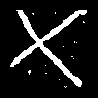

4
[-1687.4769 -1709.0989 -3848.8252     0.    ]
97.43589743589743


In [0]:
#11
total = 0
acc = 0
diffs = []
with torch.no_grad():
    for img_name in glob.iglob(folder_digits + '2/*'):
        total += 1
        #print(img_name)

        img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
        #img = img[5:-5, 5:-5]
        img = cv.GaussianBlur(img, (7, 7), 0)
        th = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,2)
        th = cv.bitwise_not(th)
        th = th [5:-5, 5:-5]
        th = cv.copyMakeBorder(th, 10, 10, 10, 10, cv.BORDER_CONSTANT, None, 0)
        #cv2_imshow(th)
        resized = cv.resize(th, (28, 28), interpolation = cv.INTER_AREA)
        resized = np.array(resized, dtype = float)
        data = torch.from_numpy(np.expand_dims(np.expand_dims(resized, 0), 0))
        data = data.type(torch.FloatTensor)

        data = data.to(device)
        output = model(data)
        output = output[0].cpu().numpy()
        output = output[1:5]
        #print(output)

        pred = output.argmax() + 1 # get the index of the max log-probability
        #print(pred)
        if pred == 2:
            acc += 1
        else:
            cv2_imshow(th)
            print(pred)
            print(output)

print(acc * 100 / total)

In [0]:
#12
total = 0
acc = 0
with torch.no_grad():
    for img_name in glob.iglob(folder_digits + '3/*'):
        total += 1
        #print(img_name)

        img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
        #img = img[5:-5, 5:-5]
        img = cv.GaussianBlur(img, (7, 7), 0)
        th = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,2)
        th = cv.bitwise_not(th)
        th = th [5:-5, 5:-5]
        th = cv.copyMakeBorder(th, 10, 10, 10, 10, cv.BORDER_CONSTANT, None, 0)
        #cv2_imshow(th)
        resized = cv.resize(th, (28, 28), interpolation = cv.INTER_AREA)
        resized = np.array(resized, dtype = float)
        data = torch.from_numpy(np.expand_dims(np.expand_dims(resized, 0), 0))
        data = data.type(torch.FloatTensor)

        data = data.to(device)
        output = model(data)
        output = output[0].cpu().numpy()
        output = output[1:5]
        #print(output)

        pred = output.argmax() + 1 # get the index of the max log-probability
        #print(pred)
        if pred == 3:
            acc += 1
        else:
            cv2_imshow(th)
            print(pred)
            print(output)

print(acc * 100 / total)

100.0


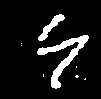

3
[-3029.403  -2444.0122     0.     -1507.2048]


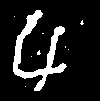

4
[-2578.469  -2929.4807 -4028.2766 -1815.5994]
93.75


In [0]:
#13
total = 0
acc = 0
with torch.no_grad():
    for img_name in glob.iglob(folder_digits + '4/*'):
        total += 1
        #print(img_name)

        img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
        #img = img[5:-5, 5:-5]
        img = cv.GaussianBlur(img, (7, 7), 0)
        th = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,2)
        th = cv.bitwise_not(th)
        th = th [5:-5, 5:-5]
        th = cv.copyMakeBorder(th, 10, 10, 10, 10, cv.BORDER_CONSTANT, None, 0)
        #cv2_imshow(th)
        resized = cv.resize(th, (28, 28), interpolation = cv.INTER_AREA)
        resized = np.array(resized, dtype = float)
        data = torch.from_numpy(np.expand_dims(np.expand_dims(resized, 0), 0))
        data = data.type(torch.FloatTensor)

        data = data.to(device)
        output = model(data)
        output = output[0].cpu().numpy()
        output = output[1:5]
        #print(output)

        pred = output.argmax() + 1 # get the index of the max log-probability
        #print(pred)
        if pred == 4 and output[3] - output[0] > 2000:
            acc += 1
        else:
            cv2_imshow(th)
            print(pred)
            print(output)

print(acc * 100 / total)

In [0]:
#14
def eval_patch(patch):
    with torch.no_grad():

        (h, w) = patch.shape[:2]
        if h == 0 or w == 0:
            return None
        width = 90
        r = width / float(w)
        dim = (width, int(h * r))
        patch = cv.resize(patch, dim, interpolation = cv.INTER_AREA)

        #img = img[5:-5, 5:-5]
        img = cv.GaussianBlur(patch, (7, 7), 0)
        th = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,2)
        th = cv.bitwise_not(th)
        th = th [5:-5, 5:-5]
        th = cv.copyMakeBorder(th, 10, 10, 10, 10, cv.BORDER_CONSTANT, None, 0)
        #cv2_imshow(th)
        resized = cv.resize(th, (28, 28), interpolation = cv.INTER_AREA)
        resized = np.array(resized, dtype = float)
        data = torch.from_numpy(np.expand_dims(np.expand_dims(resized, 0), 0))
        data = data.type(torch.FloatTensor)

        data = data.to(device)
        output = model(data)
        output = output[0].cpu().numpy()
        output = output[1:5]
        #print(output)

        pred = output.argmax() + 1 # get the index of the max log-probability
        #print(pred)
        if pred == 4 and output[3] - output[0] < 2000:
            pred = 1
        return pred

In [0]:
#15
def set_global_cols_and_rows_for_scenario_3():
    img_template = cv.imread(data_dir_drive + '/data/template.jpg')
    (h, w) = img_template.shape[:2]
    width = 3500
    r = width / float(w)
    dim = (width, int(h * r))
    img_template = cv.resize(img_template, dim, interpolation = cv.INTER_AREA)
    orig_h, orig_w, _ = img_template.shape
    img_template = img_template[int(orig_h * 0):int(orig_h * 0.83)]
    img_template = img_template[:, int(orig_w * 0.05):int(orig_w * 0.95)]

    #print_img(img_template)
    img_template = cv.GaussianBlur(img_template,(7,7),0)
    img_template = cv.cvtColor(img_template, cv.COLOR_BGR2GRAY)

    left_img_template = img_template[:, :orig_w//2]
    right_img_template = img_template[:, orig_w//2:]

    _, _, cols_l, rows_l = find_table(left_img_template)
    _, _, cols_r, rows_r = find_table(right_img_template)

    return cols_l, rows_l, cols_r, rows_r

cols_l, rows_l, cols_r, rows_r = set_global_cols_and_rows_for_scenario_3()

In [0]:
#16
def predict_grade_scenario_3(path):
    cols_l, rows_l, cols_r, rows_r = set_global_cols_and_rows_for_scenario_3()

    aligned_image2 = transform_rotaded_and_perspective_in_scanned(path)
    #print_img(aligned_image2)

    # take the lower part of the image
    orig_h, orig_w, _ = aligned_image2.shape
    aligned_image2 = aligned_image2[int(orig_h * 0):int(orig_h * 0.83)]
    image = aligned_image2[:, int(orig_w * 0.05):int(orig_w * 0.95)]

    #print_img(image)
    img_blur = cv.GaussianBlur(image,(7,7),0)
    grayscale_image = cv.cvtColor(img_blur, cv.COLOR_BGR2GRAY)
    th = cv.adaptiveThreshold(grayscale_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

    left_grayscale_image = th[:, :orig_w//2]
    right_grayscale_image = th[:, orig_w//2:]

    result_l, image_l = find_x(left_grayscale_image, cols_l, rows_l)
    #print(result_l)
    result_r, image_r = find_x(right_grayscale_image, cols_r, rows_r)
    #print(result_r)

    x_min = cols_r[-2][0][0]
    x_max = cols_r[-1][0][0]
    y_min = 0 
    y_max = rows_r[0][1][1] - 2*(rows_r[1][1][1]-rows_r[0][1][1]) # 2 randuri in sus

    patch = grayscale_image[:, orig_w//2:]
    patch = patch[y_min:y_max, x_min:x_max]
    #print_img(patch)

    bbox_1, bbox_2 = detect_subject_choice(patch, rows_r, cols_r)

    (x_min_1, y_min_1), (x_max_1, y_max_1) = bbox_1
    (x_min_2, y_min_2), (x_max_2, y_max_2) = bbox_2
            
    patch1 = patch[y_min_1 + 10:y_max_1 - 10, x_min_1 + 10:x_max_1 - 10]
    patch2 = patch[y_min_2 + 10:y_max_2 - 10, x_min_2 + 10:x_max_2 - 10]

    if y_min_1 > y_min_2:
        patch1, patch2 = patch2, patch1

    mean_patch_box_1 = np.round(patch1.mean())
    mean_patch_box_2 = np.round(patch2.mean())

    subject, number = 0, 0
    choice_patch_color = np.dstack((patch, patch, patch))
    if mean_patch_box_1 < mean_patch_box_2: #Info
        subject = 'I'
        number = eval_patch(patch1)
        cv.rectangle(choice_patch_color, (x_min_1 + 10, y_min_1 + 10), (x_max_1 - 10, y_max_1 - 10), color=(255, 0, 255), thickness=5)
    else: #Fizica
        subject = 'F'
        number = eval_patch(patch2)
        cv.rectangle(choice_patch_color, (x_min_2 + 10, y_min_2 + 10), (x_max_2 - 10, y_max_2 - 10), color=(0, 255, 255), thickness=5)

    #print(subject)
    #print(number)

    number_ok = 0
    # load ground truth correct answers / barem
    if subject == 'F':
        if number == 1:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta1.txt', dtype=str)
        elif number == 2:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta2.txt', dtype=str)
        elif number == 3:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta3.txt', dtype=str)
        else:
            ground_truth_content = np.loadtxt(folder_barem + 'Fizica_varianta4.txt', dtype=str)
    else:
        if number == 1:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta1.txt', dtype=str)
        elif number == 2:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta2.txt', dtype=str)
        elif number == 3:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta3.txt', dtype=str)
        else:
            ground_truth_content = np.loadtxt(folder_barem + 'Informatica_varianta4.txt', dtype=str)

    ground_truth_left = ground_truth_content[1:16]
    ground_truth_right = ground_truth_content[16:-1]

    left_mis = 0;
    for r in range(15):
        tr_ans = ground_truth_left[r][1]
        if r + 1 not in result_l.keys():
            left_mis += 1
        else:
            if len(result_l[r+1]) > 1:
                left_mis += 1
            else:
                if result_l[r+1][0] != tr_ans:
                    left_mis += 1
                else:
                    number_ok += 1

    right_mis = 0;
    for r in range(15):
        tr_ans = ground_truth_right[r][1]
        if r + 1 not in result_r.keys():
            right_mis += 1
        else:
            if len(result_r[r+1]) > 1:
                right_mis += 1
            else:
                if result_r[r+1][0] != tr_ans:
                    right_mis += 1
                else:
                    number_ok += 1

    return (number_ok * 3) / 10 + 1, subject, number, th

image_1.jpg
image_2.jpg
image_3.jpg
image_4.jpg
image_5.jpg
image_6.jpg
image_7.jpg
image_8.jpg
image_9.jpg
image_10.jpg
image_11.jpg
image_12.jpg
image_13.jpg
image_14.jpg
image_15.jpg
image_16.jpg
image_17.jpg
image_18.jpg
image_19.jpg
image_20.jpg
image_21.jpg
image_22.jpg
image_23.jpg
image_24.jpg
image_25.jpg
image_26.jpg
image_27.jpg
image_28.jpg
image_29.jpg
image_30.jpg
image_31.jpg
image_32.jpg
image_33.jpg
GRESEALA
3.4
F
4


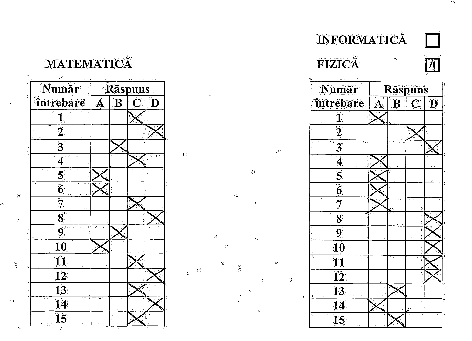

image_34.jpg
image_35.jpg
image_36.jpg
image_37.jpg
image_38.jpg
image_39.jpg
image_40.jpg
image_41.jpg
GRESEALA
3.1
F
1


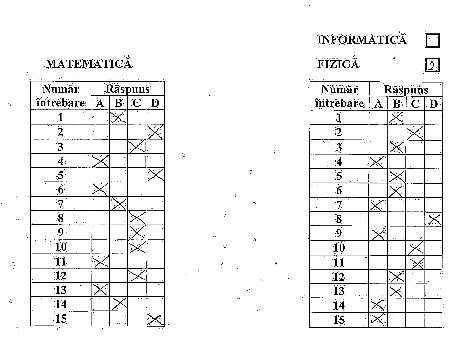

image_42.jpg
image_43.jpg
image_44.jpg
image_45.jpg
image_46.jpg
GRESEALA
2.2
F
2


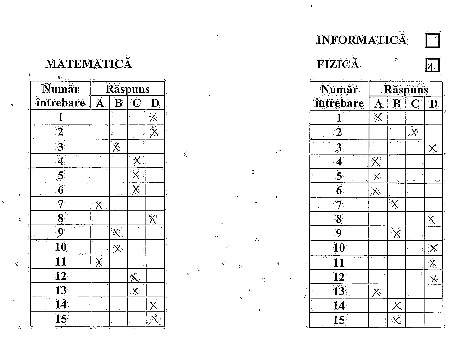

image_47.jpg
image_48.jpg
image_49.jpg
image_50.jpg
image_51.jpg
image_52.jpg
GRESEALA
1.9
I
1


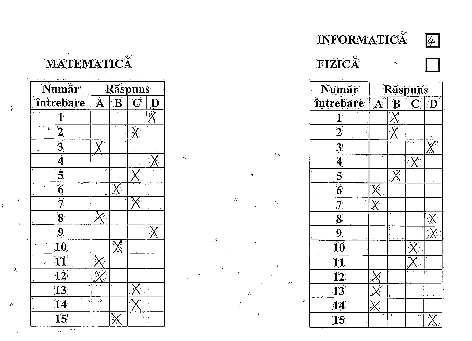

image_53.jpg
image_54.jpg
image_55.jpg
image_56.jpg
image_57.jpg
image_58.jpg
image_59.jpg
image_60.jpg
image_61.jpg
image_62.jpg
image_63.jpg
image_64.jpg
image_65.jpg
image_66.jpg
image_67.jpg
image_68.jpg
image_69.jpg
image_70.jpg
image_71.jpg
image_72.jpg
image_73.jpg
image_74.jpg
image_75.jpg
image_76.jpg
image_77.jpg
image_78.jpg
image_79.jpg
image_80.jpg
image_81.jpg
image_82.jpg
image_83.jpg
image_84.jpg
image_85.jpg
image_86.jpg
image_87.jpg
image_88.jpg
image_89.jpg
image_90.jpg
image_91.jpg
image_92.jpg
GRESEALA
3.1
I
1


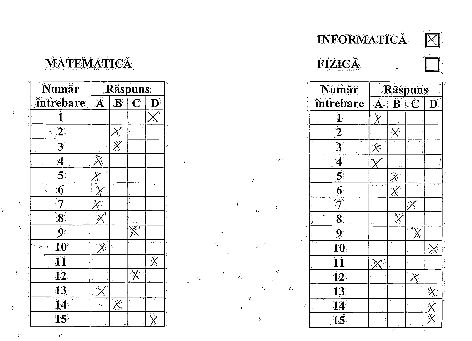

image_93.jpg
image_94.jpg
image_95.jpg
GRESEALA
2.8
I
3


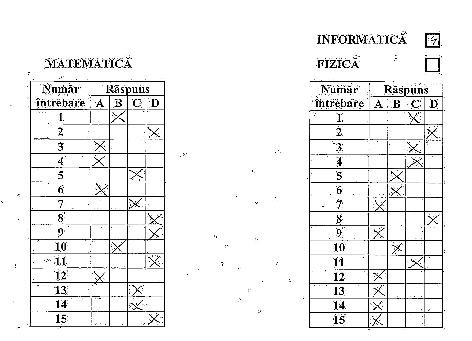

image_96.jpg
image_97.jpg
image_98.jpg
image_99.jpg
image_100.jpg
image_101.jpg
image_102.jpg
image_103.jpg
image_104.jpg
image_105.jpg
image_106.jpg
image_107.jpg
image_108.jpg
image_109.jpg
image_110.jpg
image_111.jpg
image_112.jpg
image_113.jpg
image_114.jpg
image_115.jpg
GRESEALA
3.7
F
1


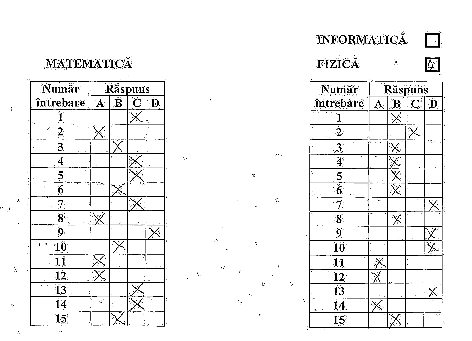

image_116.jpg
image_117.jpg
image_118.jpg
image_119.jpg
image_120.jpg
image_121.jpg
image_122.jpg
image_123.jpg
image_124.jpg
image_125.jpg
image_126.jpg
image_127.jpg
image_128.jpg
image_129.jpg
image_130.jpg
image_131.jpg
image_132.jpg
image_133.jpg
image_134.jpg
image_135.jpg
image_136.jpg
GRESEALA
4.0
F
1


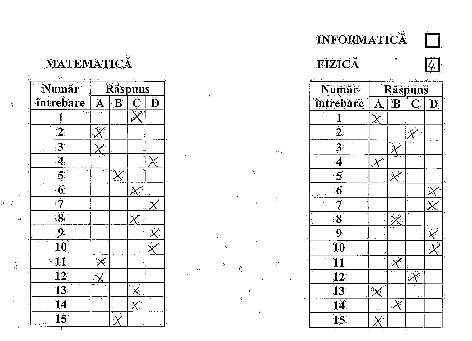

image_137.jpg
image_138.jpg
image_139.jpg
image_140.jpg
image_141.jpg
image_142.jpg
image_143.jpg
image_144.jpg
image_145.jpg
image_146.jpg
image_147.jpg
image_148.jpg
image_149.jpg
image_150.jpg
Acc = 94.66666666666667 %


In [0]:
#17
acc = 0
for i in range(1, 151):
    image_name = 'image_' + str(i) + '.jpg'
   
    print(image_name)
    file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
    first_line = file.readline()
    file.close() 
    first_line = first_line.replace('\n', '')
    info = first_line.split(' ')

    try:
        grade, subject, number, th = predict_grade_scenario_3(folder_in + image_name)

        if ground_truth_hw_dict[i] == str(grade) and subject == info[0] and number == int(info[1]):
            acc += 1
        else:
            print("GRESEALA")
            print( grade )
            print( subject )
            print( number )
            print_img( th )

    except Exception as e:
        print(e)
        continue

print("Acc = " + str(acc * 100 / 150) + " %")

perspective_1.jpg
perspective_2.jpg
perspective_3.jpg
perspective_4.jpg
perspective_5.jpg
perspective_6.jpg
GRESEALA
3.1
I
1


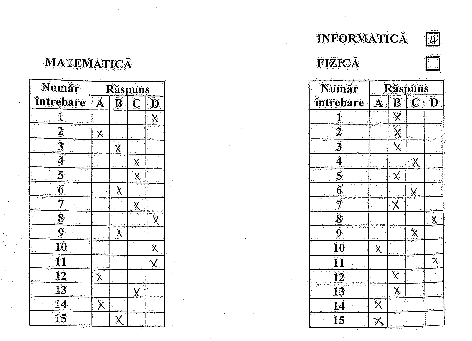

perspective_7.jpg
perspective_8.jpg
perspective_9.jpg
perspective_10.jpg
perspective_11.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


PASS
perspective_12.jpg
perspective_13.jpg
perspective_14.jpg
perspective_15.jpg
perspective_16.jpg
GRESEALA
3.4
F
1


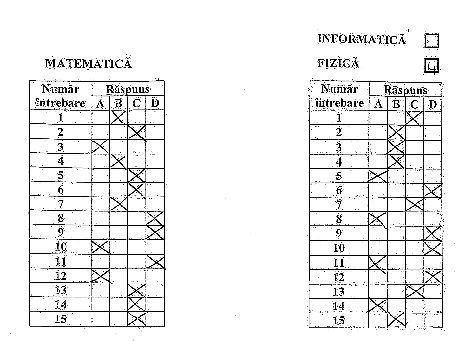

perspective_17.jpg
perspective_18.jpg
perspective_19.jpg
perspective_20.jpg
perspective_21.jpg
perspective_22.jpg
perspective_23.jpg
perspective_24.jpg
perspective_25.jpg
perspective_26.jpg
perspective_27.jpg
perspective_28.jpg
perspective_29.jpg
perspective_30.jpg
perspective_31.jpg
perspective_32.jpg
perspective_33.jpg
perspective_34.jpg
perspective_35.jpg
perspective_36.jpg
perspective_37.jpg
perspective_38.jpg
perspective_39.jpg
perspective_40.jpg
perspective_41.jpg
perspective_42.jpg
perspective_43.jpg
perspective_44.jpg
perspective_45.jpg
perspective_46.jpg
perspective_47.jpg
perspective_48.jpg
perspective_49.jpg
perspective_50.jpg
perspective_51.jpg
perspective_52.jpg
perspective_53.jpg
perspective_54.jpg
perspective_55.jpg
perspective_56.jpg
perspective_57.jpg
perspective_58.jpg
perspective_59.jpg
perspective_60.jpg
perspective_61.jpg
perspective_62.jpg
perspective_63.jpg
perspective_64.jpg
perspective_65.jpg
perspective_66.jpg
perspective_67.jpg
perspective_68.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice.


PASS
perspective_69.jpg
perspective_70.jpg
perspective_71.jpg
perspective_72.jpg
perspective_73.jpg
perspective_74.jpg
perspective_75.jpg
perspective_76.jpg
perspective_77.jpg
perspective_78.jpg
perspective_79.jpg
perspective_80.jpg
perspective_81.jpg
perspective_82.jpg
perspective_83.jpg
perspective_84.jpg
perspective_85.jpg
perspective_86.jpg
perspective_87.jpg
perspective_88.jpg
perspective_89.jpg
perspective_90.jpg
perspective_91.jpg
perspective_92.jpg
GRESEALA
3.1
I
1


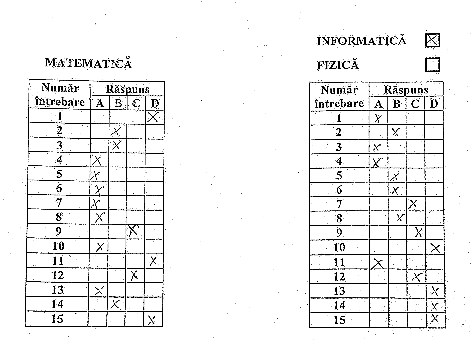

perspective_93.jpg
perspective_94.jpg
perspective_95.jpg
GRESEALA
2.8
I
3


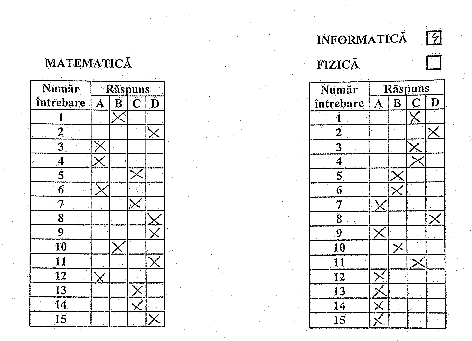

perspective_96.jpg
perspective_97.jpg
perspective_98.jpg
perspective_99.jpg
perspective_100.jpg
perspective_101.jpg
perspective_102.jpg
perspective_103.jpg
perspective_104.jpg
perspective_105.jpg
perspective_106.jpg
perspective_107.jpg
perspective_108.jpg
perspective_109.jpg
perspective_110.jpg
perspective_111.jpg
perspective_112.jpg
perspective_113.jpg
perspective_114.jpg
perspective_115.jpg
GRESEALA
3.7
F
1


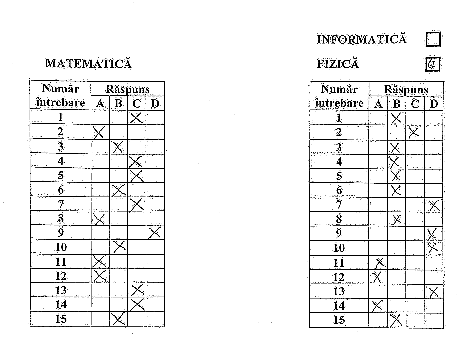

perspective_116.jpg
perspective_117.jpg
perspective_118.jpg
perspective_119.jpg
perspective_120.jpg
perspective_121.jpg
perspective_122.jpg
perspective_123.jpg
perspective_124.jpg
perspective_125.jpg
perspective_126.jpg
perspective_127.jpg
perspective_128.jpg
perspective_129.jpg
perspective_130.jpg
perspective_131.jpg
perspective_132.jpg
perspective_133.jpg
perspective_134.jpg
perspective_135.jpg
perspective_136.jpg
perspective_137.jpg
perspective_138.jpg
perspective_139.jpg
perspective_140.jpg
perspective_141.jpg
perspective_142.jpg
perspective_143.jpg
perspective_144.jpg
perspective_145.jpg
perspective_146.jpg
perspective_147.jpg
perspective_148.jpg
perspective_149.jpg
perspective_150.jpg
Acc = 95.33333333333333 %


In [0]:
#18
acc = 0
for i in range(1, 151):
    image_name = 'perspective_' + str(i) + '.jpg'
   
    print(image_name)
    file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
    first_line = file.readline()
    file.close() 
    first_line = first_line.replace('\n', '')
    info = first_line.split(' ')

    try:
        grade, subject, number, th = predict_grade_scenario_3(folder_in + image_name)

        if ground_truth_hw_dict[i] == str(grade) and subject == info[0] and number == int(info[1]):
            acc += 1
        else:
            print("GRESEALA")
            print( grade )
            print( subject )
            print( number )
            print_img( th )

    except Exception as e:
        print(e)
        continue

print("Acc = " + str(acc * 100 / 150) + " %")

rotation_1.jpg
rotation_2.jpg
rotation_3.jpg
rotation_4.jpg
rotation_5.jpg
rotation_6.jpg
rotation_7.jpg
rotation_8.jpg
rotation_9.jpg
rotation_10.jpg
rotation_11.jpg
rotation_12.jpg
rotation_13.jpg
rotation_14.jpg
rotation_15.jpg
rotation_16.jpg
GRESEALA
3.4
F
1


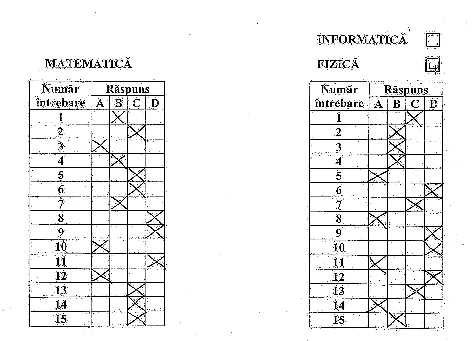

rotation_17.jpg
rotation_18.jpg
rotation_19.jpg
rotation_20.jpg
rotation_21.jpg
rotation_22.jpg
rotation_23.jpg
rotation_24.jpg
rotation_25.jpg
rotation_26.jpg
rotation_27.jpg
rotation_28.jpg
rotation_29.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice.


GRESEALA
3.4
F
None


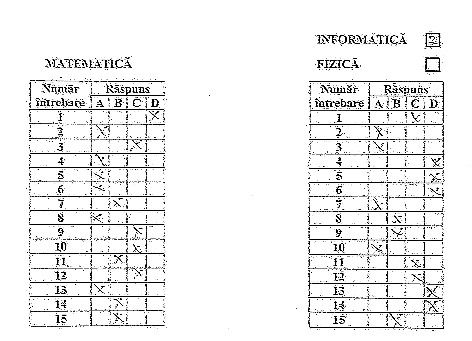

rotation_30.jpg
rotation_31.jpg
rotation_32.jpg
rotation_33.jpg
rotation_34.jpg
rotation_35.jpg
rotation_36.jpg
rotation_37.jpg
rotation_38.jpg
rotation_39.jpg
rotation_40.jpg
rotation_41.jpg
GRESEALA
3.7
F
3


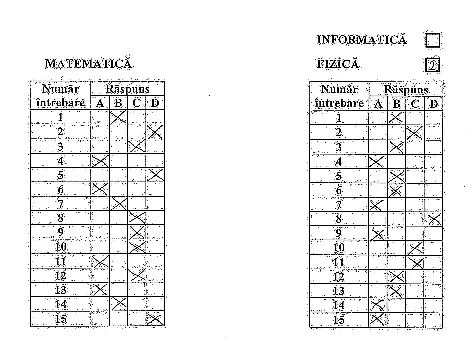

rotation_42.jpg
rotation_43.jpg
rotation_44.jpg
rotation_45.jpg
rotation_46.jpg
rotation_47.jpg
rotation_48.jpg
rotation_49.jpg
rotation_50.jpg
rotation_51.jpg
rotation_52.jpg
rotation_53.jpg
rotation_54.jpg
rotation_55.jpg
rotation_56.jpg
rotation_57.jpg
rotation_58.jpg
rotation_59.jpg
rotation_60.jpg
rotation_61.jpg
rotation_62.jpg
rotation_63.jpg
rotation_64.jpg
rotation_65.jpg
rotation_66.jpg
rotation_67.jpg
rotation_68.jpg
rotation_69.jpg
rotation_70.jpg
rotation_71.jpg
rotation_72.jpg
rotation_73.jpg
rotation_74.jpg
rotation_75.jpg
rotation_76.jpg
rotation_77.jpg
rotation_78.jpg
rotation_79.jpg
rotation_80.jpg
rotation_81.jpg
rotation_82.jpg
rotation_83.jpg
rotation_84.jpg
rotation_85.jpg
rotation_86.jpg
rotation_87.jpg
rotation_88.jpg
rotation_89.jpg
rotation_90.jpg
rotation_91.jpg
rotation_92.jpg
GRESEALA
3.1
I
1


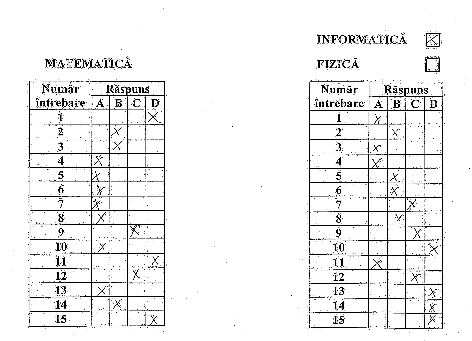

rotation_93.jpg
rotation_94.jpg
rotation_95.jpg
GRESEALA
2.8
I
3


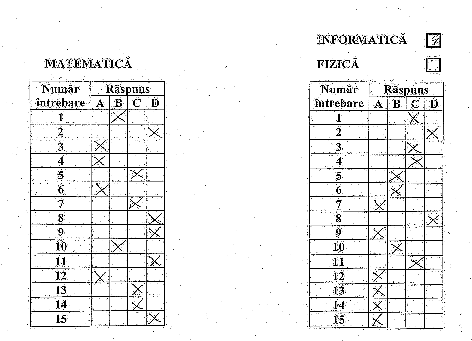

rotation_96.jpg
rotation_97.jpg
rotation_98.jpg
rotation_99.jpg
rotation_100.jpg
rotation_101.jpg
rotation_102.jpg
rotation_103.jpg
rotation_104.jpg
rotation_105.jpg
rotation_106.jpg
rotation_107.jpg
rotation_108.jpg
rotation_109.jpg
rotation_110.jpg
rotation_111.jpg
rotation_112.jpg
rotation_113.jpg
rotation_114.jpg
rotation_115.jpg
GRESEALA
3.7
F
1


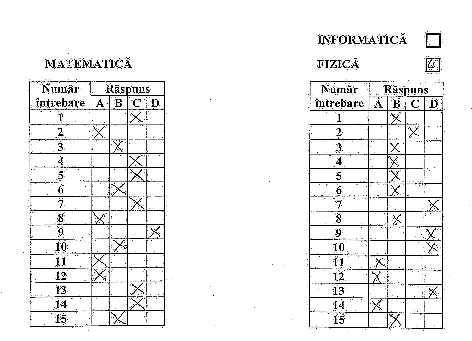

rotation_116.jpg
rotation_117.jpg
rotation_118.jpg
rotation_119.jpg
rotation_120.jpg
rotation_121.jpg
rotation_122.jpg
rotation_123.jpg
rotation_124.jpg
rotation_125.jpg
rotation_126.jpg
rotation_127.jpg
rotation_128.jpg
rotation_129.jpg
rotation_130.jpg
rotation_131.jpg
rotation_132.jpg
rotation_133.jpg
rotation_134.jpg
rotation_135.jpg
rotation_136.jpg
GRESEALA
4.0
F
1


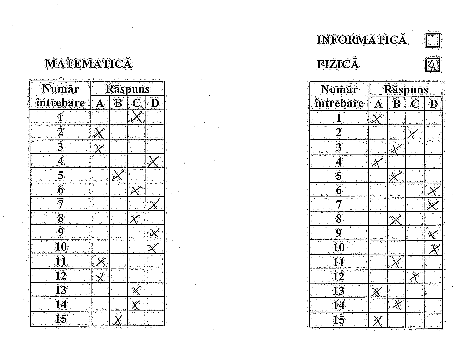

rotation_137.jpg
rotation_138.jpg
rotation_139.jpg
rotation_140.jpg
rotation_141.jpg
rotation_142.jpg
rotation_143.jpg
rotation_144.jpg
rotation_145.jpg
rotation_146.jpg
rotation_147.jpg
rotation_148.jpg
rotation_149.jpg
rotation_150.jpg
Acc = 95.33333333333333 %


In [0]:
#19
acc = 0
for i in range(1, 151):
    image_name = 'rotation_' + str(i) + '.jpg'
   
    print(image_name)
    file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
    first_line = file.readline()
    file.close() 
    first_line = first_line.replace('\n', '')
    info = first_line.split(' ')

    grade, subject, number, th = predict_grade_scenario_3(folder_in + image_name)

    try:
        grade, subject, number, th = predict_grade_scenario_3(folder_in + image_name)

        if ground_truth_hw_dict[i] == str(grade) and subject == info[0] and number == int(info[1]):
            acc += 1
        else:
            print("GRESEALA")
            print( grade )
            print( subject )
            print( number )
            print_img( th )

    except Exception as e:
        print(e)
        continue

print("Acc = " + str(acc * 100 / 150) + " %")

# **Scenario 4 (handwritten recognition)**
Your receive a test set containing 25 scanned images. We will make sure to modify some content such that the grade written in red to be different that the grade obtained by a perfect grading system. For each image you have to output the corresponding handwritten grade.

In [0]:
#1
hack = {1:[0,3,6,9],
        2:[2,5,8],
        3:[1,4,7],
        4:[0,3,6,9],
        5:[2,5,8],
        6:[1,4,7],
        7:[0,3,6,9],
        8:[2,5,8],
        9:[1,4,7]}

In [0]:
#2
def cut_background(image, proj):
    w, h = image.shape[::-1]
    left = 0
    ref_sum_img = np.sum(image, axis = 0)
    ref_sum_img = ref_sum_img //255
    in_0_region = False
    count_in_0_region = 0
    line = 0
    
    for line in range(int(len(ref_sum_img) * proj)):
        if ref_sum_img[line] < 5:
            if not in_0_region:
                count_in_0_region = 0
                in_0_region = True
            else:
                count_in_0_region += 1
        else:
            in_0_region = False
            if count_in_0_region >= 10:
                left = line - 1
                break

    if count_in_0_region >= 10:
        left = line - 1
    return image[:, left:]

In [0]:
#3
def predict_first_digit(image):
    w, h = image.shape[::-1]
    img_model = image[:, :int(0.4 * w)]
    img_model = cv.copyMakeBorder(img_model, 1, 1, 1, 1, cv.BORDER_CONSTANT, None, 0)

    w, h = img_model.shape[::-1]

    if w > h:
        diff = w - h
        img_model = cv.copyMakeBorder(img_model, diff // 2, diff - diff//2, 0, 0, cv.BORDER_CONSTANT, None, 0)

    if w < h:
        diff = h - w
        img_model = cv.copyMakeBorder(img_model, 0, 0, diff // 2, diff - diff//2, cv.BORDER_CONSTANT, None, 0)

    cv2_imshow(img_model)
    resized = cv.resize(img_model, (28, 28), interpolation = cv.INTER_AREA)
    resized = np.array(resized, dtype = float)
    data = torch.from_numpy(np.expand_dims(np.expand_dims(resized, 0), 0))
    data = data.type(torch.FloatTensor)

    data = data.to(device)
    output = model(data)
    output = output[0].detach().cpu().numpy()
    #print(output)
    output = output[3:]
    pred = output.argmax() + 3 # get the index of the max log-probability
    return pred

In [0]:
#4
def predict_second_digit(image, pred1):
    w, h = image.shape[::-1]
    img_model = image[:, int(0.5 * w):int(0.85 * w)]
    img_model = cv.copyMakeBorder(img_model, 1, 1, 1, 1, cv.BORDER_CONSTANT, None, 0)

    w, h = img_model.shape[::-1]

    if w > h:
        diff = w - h
        img_model = cv.copyMakeBorder(img_model, diff // 2, diff - diff//2, 0, 0, cv.BORDER_CONSTANT, None, 0)

    if w < h:
        diff = h - w
        img_model = cv.copyMakeBorder(img_model, 0, 0, diff // 2, diff - diff//2, cv.BORDER_CONSTANT, None, 0)

    cv2_imshow(img_model)
    resized = cv.resize(img_model, (28, 28), interpolation = cv.INTER_AREA)
    resized = np.array(resized, dtype = float)
    data = torch.from_numpy(np.expand_dims(np.expand_dims(resized, 0), 0))
    data = data.type(torch.FloatTensor)

    data = data.to(device)
    output = model(data)
    output = output[0].detach().cpu().numpy()

    #print(output)
    #print(hack[pred1])
    output2 = output[hack[pred1]]
    #print(output2)
    pred = 3 * np.argmax(output2)

    if pred1 == 3 or pred1 == 6 or pred1 == 9:
        pred += 1
    if pred1 == 2 or pred1 == 5 or pred1 == 8:
        pred += 2

    return pred

In [0]:
#5
def make_data_set_handwritten():

    if not os.path.exists(folder_digits + 'handwritten'):
        os.makedirs(folder_digits + 'handwritten')

    for f in glob.iglob(folder_digits + 'handwritten/*'):
        os.remove(f)

    perm = np.random.permutation(range(1, 151))
    acc = 0
    for i in range(1, 151): 
        file = open(folder_in + 'image_' + str(i) +'.txt', 'r')
        first_line = file.readline()
        file.close() 
        first_line = first_line.replace('\n', '')
        info = first_line.split(' ')

        image_name = 'image_' + str(i) + '.jpg'
    
        print(image_name)
        # load image
        image = cv.imread(folder_in + image_name)

        try:
            orig_h, orig_w, _ = image.shape
            image = image[int(orig_h * 0.29):int(orig_h * 0.33)]
            image = image[:, int(orig_w * 0.08):int(orig_w * 0.29)]
            orig_h, orig_w, _ = image.shape

            img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            img = cv.GaussianBlur(img, (11, 11), 0)
            th = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,7,2)
            th = cv.bitwise_not(th)
            #cv2_imshow(th)

            template = cv.imread(data_dir_drive + '/template_matching.JPG',0)
            w, h = template.shape[::-1]
            img = th.copy()
            left_cut_size = int(orig_w * 0.25)
            right_cut_size = int(orig_w * 0.55)
            img = img[:, left_cut_size:right_cut_size]
            method = eval('cv.TM_CCOEFF_NORMED')
            # Apply template Matching
            res = cv.matchTemplate(img,template, cv.TM_CCOEFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
            top_left = (max_loc[0] + left_cut_size, max_loc[1])
            bottom_right = (top_left[0] + w, top_left[1] + h)
            #cv.rectangle(th,top_left, bottom_right, 255, 2)
            #cv2_imshow(th)
            new_th = th[:, :max_loc[0] + left_cut_size]
            #cv2_imshow(new_th)
        
            template = cv.imread(data_dir_drive + '/template_matching2.JPG',0)
            w, h = template.shape[::-1]
            img = new_th.copy()
            method = eval('cv.TM_CCOEFF_NORMED')
            # Apply template Matching
            res = cv.matchTemplate(img,template, cv.TM_CCOEFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
            top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)
            #cv.rectangle(new_th,top_left, bottom_right, 255, 2)
            #cv2_imshow(new_th)
            new_th = new_th[:top_left[1], :]
            #cv2_imshow(new_th)

            new_th = cut_background(new_th, 0.5)
            new_th = np.transpose(cut_background(np.transpose(new_th), 0.5))
            new_th = np.fliplr(cut_background(np.fliplr(new_th), 0.1))
            new_th = np.flipud(cut_background(np.flipud(new_th), 0.1))
            #cv2_imshow(new_th)

            pred1 = predict_first_digit(new_th)
            #print(pred1)
            pred2 = predict_second_digit(new_th, pred1)
            #print(pred2)

            print("RASPUNS = " + str((10 * pred1 + pred2) / 10))
            print("TRUE = " + ground_truth_hw_dict[i])
            if ground_truth_hw_dict[i] == str((10 * pred1 + pred2) / 10):
                acc += 1

        except Exception as e:
            print(e)
            
    print("ACC = " + str(acc / 150))

make_data_set_handwritten()

image_1.jpg
RASPUNS = 4.3
TRUE = 4.9
image_2.jpg
RASPUNS = 6.4
TRUE = 6.7
image_3.jpg
RASPUNS = 3.4
TRUE = 5.8
image_4.jpg
RASPUNS = 8.8
TRUE = 8.5
image_5.jpg
RASPUNS = 8.2
TRUE = 4.9
image_6.jpg
RASPUNS = 6.7
TRUE = 6.7
image_7.jpg
RASPUNS = 3.4
TRUE = 9.1
image_8.jpg
RASPUNS = 7.3
TRUE = 3.7
image_9.jpg
RASPUNS = 3.7
TRUE = 5.5
image_10.jpg
RASPUNS = 3.7
TRUE = 5.5
image_11.jpg
RASPUNS = 3.4
TRUE = 4.6
image_12.jpg
RASPUNS = 6.7
TRUE = 6.7
image_13.jpg
RASPUNS = 7.3
TRUE = 7.3
image_14.jpg
RASPUNS = 3.4
TRUE = 6.4
image_15.jpg
RASPUNS = 4.9
TRUE = 7.0
image_16.jpg
RASPUNS = 7.6
TRUE = 4.6
image_17.jpg
RASPUNS = 4.6
TRUE = 7.6
image_18.jpg
RASPUNS = 6.4
TRUE = 6.1
image_19.jpg
RASPUNS = 4.3
TRUE = 4.9
image_20.jpg
RASPUNS = 7.6
TRUE = 7.6
image_21.jpg
RASPUNS = 6.4
TRUE = 6.4
image_22.jpg
RASPUNS = 3.7
TRUE = 5.5
image_23.jpg
RASPUNS = 6.4
TRUE = 6.4
image_24.jpg
RASPUNS = 4.3
TRUE = 7.3
image_25.jpg
RASPUNS = 4.3
TRUE = 7.9
image_26.jpg
RASPUNS = 8.2
TRUE = 8.5
image_27.jpg
RASPUNS 

In [0]:
#6
def predict_grade_scenario_4(path):
    try:
        image = cv.imread(path)
        orig_h, orig_w, _ = image.shape
        image = image[int(orig_h * 0.29):int(orig_h * 0.33)]
        image = image[:, int(orig_w * 0.08):int(orig_w * 0.29)]
        orig_h, orig_w, _ = image.shape

        img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        img = cv.GaussianBlur(img, (11, 11), 0)
        th = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,7,2)
        th = cv.bitwise_not(th)
        #cv2_imshow(th)

        template = cv.imread(data_dir_drive + '/template_matching.JPG',0)
        w, h = template.shape[::-1]
        img = th.copy()
        left_cut_size = int(orig_w * 0.25)
        right_cut_size = int(orig_w * 0.55)
        img = img[:, left_cut_size:right_cut_size]
        method = eval('cv.TM_CCOEFF_NORMED')
        # Apply template Matching
        res = cv.matchTemplate(img,template, cv.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        top_left = (max_loc[0] + left_cut_size, max_loc[1])
        bottom_right = (top_left[0] + w, top_left[1] + h)
        #cv.rectangle(th,top_left, bottom_right, 255, 2)
        #cv2_imshow(th)
        new_th = th[:, :max_loc[0] + left_cut_size]
        #cv2_imshow(new_th)
        
        template = cv.imread(data_dir_drive + '/template_matching2.JPG',0)
        w, h = template.shape[::-1]
        img = new_th.copy()
        method = eval('cv.TM_CCOEFF_NORMED')
        # Apply template Matching
        res = cv.matchTemplate(img,template, cv.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        #cv.rectangle(new_th,top_left, bottom_right, 255, 2)
        #cv2_imshow(new_th)
        new_th = new_th[:top_left[1], :]
        #cv2_imshow(new_th)

        new_th = cut_background(new_th, 0.5)
        new_th = np.transpose(cut_background(np.transpose(new_th), 0.5))
        new_th = np.fliplr(cut_background(np.fliplr(new_th), 0.1))
        new_th = np.flipud(cut_background(np.flipud(new_th), 0.1))
        #cv2_imshow(new_th)

        pred1 = predict_first_digit(new_th)
        #print(pred1)
        pred2 = predict_second_digit(new_th, pred1)
        #print(pred2)

        return (10 * pred1 + pred2) / 10

    except Exception as e:
        print(e)

In [0]:
#7
acc = 0
for i in range(1, 151): 
    image_name = 'image_' + str(i) + '.jpg'
    print(image_name)
    # load image
    grade = predict_grade_scenario_4(folder_in + image_name)

    print("RASPUNS = " + str(grade))
    print("TRUE = " + ground_truth_hw_dict[i])
    if ground_truth_hw_dict[i] == str(grade):
        acc += 1

print("ACC = " + str(acc / 150))

image_1.jpg
RASPUNS = 4.3
TRUE = 4.9
image_2.jpg
RASPUNS = 6.4
TRUE = 6.7
image_3.jpg
RASPUNS = 3.4
TRUE = 5.8
image_4.jpg
RASPUNS = 8.8
TRUE = 8.5
image_5.jpg
RASPUNS = 8.2
TRUE = 4.9
image_6.jpg
RASPUNS = 6.7
TRUE = 6.7
image_7.jpg
RASPUNS = 3.4
TRUE = 9.1
image_8.jpg
RASPUNS = 7.3
TRUE = 3.7
image_9.jpg
RASPUNS = 3.7
TRUE = 5.5
image_10.jpg
RASPUNS = 3.7
TRUE = 5.5
image_11.jpg
RASPUNS = 3.4
TRUE = 4.6
image_12.jpg
RASPUNS = 6.7
TRUE = 6.7
image_13.jpg
RASPUNS = 7.3
TRUE = 7.3
image_14.jpg
RASPUNS = 3.4
TRUE = 6.4
image_15.jpg
RASPUNS = 4.9
TRUE = 7.0
image_16.jpg
RASPUNS = 7.6
TRUE = 4.6
image_17.jpg
RASPUNS = 4.6
TRUE = 7.6
image_18.jpg
RASPUNS = 6.4
TRUE = 6.1
image_19.jpg
RASPUNS = 4.3
TRUE = 4.9
image_20.jpg
RASPUNS = 7.6
TRUE = 7.6
image_21.jpg
RASPUNS = 6.4
TRUE = 6.4
image_22.jpg
RASPUNS = 3.7
TRUE = 5.5
image_23.jpg
RASPUNS = 6.4
TRUE = 6.4
image_24.jpg
RASPUNS = 4.3
TRUE = 7.3
image_25.jpg
RASPUNS = 4.3
TRUE = 7.9
image_26.jpg
RASPUNS = 8.2
TRUE = 8.5
image_27.jpg
RASPUNS 

# **Running the entire code**

In [0]:
#1
def run_scenario_1():
    ans = {}
    for f in glob.iglob(input_folder_scanned + '*.jpg'):
        aux = f.replace('.jpg', '')[-2:]
        subject, number = aux[0], int(aux[1])
        grade = predict_grade_scenario_1(f, subject, number)
        ans[f.replace(input_folder_scanned, '')] = grade
    
    f = open(output_folder + 'lupascu_marian_407_task1.txt', 'w')
    for k, v in ans.items():
        f.write("%s\t%2.2f\n" % (k, v))
    f.close()

In [0]:
#2
def run_scenario_2():
    ans = {}
    for f in glob.iglob(input_folder_rotated_and_perspective + '*.jpg'):
        aux = f.replace('.jpg', '')[-2:]
        subject, number = aux[0], int(aux[1])
        grade = predict_grade_scenario_2(f, subject, number)
        ans[f.replace(input_folder_rotated_and_perspective, '')] = grade
    
    f = open(output_folder + 'lupascu_marian_407_task2.txt', 'w')
    for k, v in ans.items():
        f.write("%s\t%2.2f\n" % (k, v))
    f.close()

In [0]:
#3
def run_scenario_3():
    ans = {}
    for f in glob.iglob(input_folder_no_annotation + '*.jpg'):
        grade, _, _, _ = predict_grade_scenario_3(f)
        ans[f.replace(input_folder_no_annotation, '')] = grade
    
    f = open(output_folder + 'lupascu_marian_407_task3.txt', 'w')
    for k, v in ans.items():
        f.write("%s\t%2.2f\n" % (k, v))
    f.close()

In [0]:
#4
def run_scenario_4():
    ans = {}
    for f in glob.iglob(input_folder_handwritten + '*.jpg'):
        grade = predict_grade_scenario_4(f)
        ans[f.replace(input_folder_handwritten, '')] = grade
    
    f = open(output_folder + 'lupascu_marian_407_task4.txt', 'w')
    for k, v in ans.items():
        f.write("%s\t%2.2f\n" % (k, v))
    f.close()

In [0]:
#5
def run():
    for f in glob.iglob(output_folder + '*'):
        os.remove(f)

    run_scenario_1()
    run_scenario_2()
    run_scenario_3()
    run_scenario_4()

In [0]:
#6
run()

In [0]:
#7
run_scenario_1()

In [0]:
#8
run_scenario_2()

In [0]:
#9
run_scenario_3()

In [0]:
#10
run_scenario_4()